<a href="https://colab.research.google.com/github/samirp92/Final-Year-Project-Time-Series-Forecasting-/blob/main/ARIMA_Ele_Power_Consumption_Forecasting_Student_ID_21072112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Forecasting Individual Household Electric Power Consumption (ARIMA model)*

# Import the required libraries

In [ ]:
# Disable warnings in the notebook for maintaining clean output
import warnings
warnings.filterwarnings('ignore')

# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data Loading

In [ ]:
# Mount the google drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Set the working directory
working_directory = "/content/drive/MyDrive/Final Year Project"

In [ ]:
# Load the data from google drive
df = pd.read_csv("/content/drive/MyDrive/Final Year Project/household_power_consumption.txt", sep=';')
df

Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
0        234.840           18.400          0.000          1.000   
1        233.630           23.000          0.000          1.000   
2        233.290           23.000          0.000          2.000   
3        233.740           23.000          0.000          1.000   
4        235.680           15.800          0.000          1.000   
...          ...              ...            ...            ...   
2075254   240.43              4.0            0.0            0.0   
2075255    240.0              4.0            0.0            0.0   
2075256   239.82              3.8            0.0            0.0   
2075257    239.7              3.8            0.0            0.0   
2075258   239.55              3.8            0.0            0.0   

         Sub_metering_3  
0                  17.0  
1                  16.0  
2                  17.0  
3                  17.0  
4                  17.0  
...                 ...  
2075254             0.0  
2075255             0.0  
2075256             0.0  
2075257             0.0  
2075258             0.0  

[2075259 rows x 9 columns]

In [ ]:
# Display DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [ ]:
# Check Summary statistics
df.describe(include='all')

Date      Time Global_active_power Global_reactive_power  \
count     2075259   2075259             2075259               2075259   
unique       1442      1440                6534                   896   
top     6/12/2008  17:24:00                   ?                 0.000   
freq         1440      1442               25979                472786   
mean          NaN       NaN                 NaN                   NaN   
std           NaN       NaN                 NaN                   NaN   
min           NaN       NaN                 NaN                   NaN   
25%           NaN       NaN                 NaN                   NaN   
50%           NaN       NaN                 NaN                   NaN   
75%           NaN       NaN                 NaN                   NaN   
max           NaN       NaN                 NaN                   NaN   

        Voltage Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
count   2075259          2075259        2075259        2075259    2.049280e+06  
unique     5168              377            153            145             NaN  
top           ?            1.000          0.000          0.000             NaN  
freq      25979           169406        1840611        1408274             NaN  
mean        NaN              NaN            NaN            NaN    6.458447e+00  
std         NaN              NaN            NaN            NaN    8.437154e+00  
min         NaN              NaN            NaN            NaN    0.000000e+00  
25%         NaN              NaN            NaN            NaN    0.000000e+00  
50%         NaN              NaN            NaN            NaN    1.000000e+00  
75%         NaN              NaN            NaN            NaN    1.700000e+01  
max         NaN              NaN            NaN            NaN    3.100000e+01

# Data Preprocessing

In [ ]:
# Replace '?' with NaN values
df.replace('?', np.nan, inplace=True)

In [ ]:
# Convert numeric columns to appropriate data types
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

# Confirm the updated data types
print(df.dtypes)

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


In [ ]:
# Convert the 'Date' and 'Time' columns to a single 'date_time' column
df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [ ]:
# Convert the 'date_time' column to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Set the 'date_time' column as the index
df.set_index('date_time', inplace=True)

# Drop the original 'Date' and 'Time' columns
df.drop(columns=['Date', 'Time'], inplace=True)

## Data Imputation

In [ ]:
# Check Missing Values
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
# Fill NaN values using the mean for each column
df.fillna(df.mean(), inplace=True)

# Feature Engineering

In [ ]:
# Create new columns for minute, hour, year, quarter, month, and day
df['minute'] = df.index.minute
df['hour'] = df.index.hour
df['day'] = df.index.day
df['week_of_year'] = df.index.isocalendar().week
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear

In [ ]:
# Creating Target Variable power consumption in watt hour
equation1 = (df['Global_active_power']*1000/60)
equation2 = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df['power_consumption'] = equation1 - equation2
df

Global_active_power  Global_reactive_power  Voltage  \
date_time                                                                  
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
...                                  ...                    ...      ...   
2010-11-26 20:58:00                0.946                  0.000   240.43   
2010-11-26 20:59:00                0.944                  0.000   240.00   
2010-11-26 21:00:00                0.938                  0.000   239.82   
2010-11-26 21:01:00                0.934                  0.000   239.70   
2010-11-26 21:02:00                0.932                  0.000   239.55   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
date_time                                                               
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   
...                               ...             ...             ...   
2010-11-26 20:58:00               4.0             0.0             0.0   
2010-11-26 20:59:00               4.0             0.0             0.0   
2010-11-26 21:00:00               3.8             0.0             0.0   
2010-11-26 21:01:00               3.8             0.0             0.0   
2010-11-26 21:02:00               3.8             0.0             0.0   

                     Sub_metering_3  minute  hour  day  week_of_year  \
date_time                                                              
2006-12-16 17:24:00            17.0      24    17   16            50   
2006-12-16 17:25:00            16.0      25    17   16            50   
2006-12-16 17:26:00            17.0      26    17   16            50   
2006-12-16 17:27:00            17.0      27    17   16            50   
2006-12-16 17:28:00            17.0      28    17   16            50   
...                             ...     ...   ...  ...           ...   
2010-11-26 20:58:00             0.0      58    20   26            47   
2010-11-26 20:59:00             0.0      59    20   26            47   
2010-11-26 21:00:00             0.0       0    21   26            47   
2010-11-26 21:01:00             0.0       1    21   26            47   
2010-11-26 21:02:00             0.0       2    21   26            47   

                     day_of_week  month  quarter  year  day_of_year  \
date_time                                                             
2006-12-16 17:24:00            5     12        4  2006          350   
2006-12-16 17:25:00            5     12        4  2006          350   
2006-12-16 17:26:00            5     12        4  2006          350   
2006-12-16 17:27:00            5     12        4  2006          350   
2006-12-16 17:28:00            5     12        4  2006          350   
...                          ...    ...      ...   ...          ...   
2010-11-26 20:58:00            4     11        4  2010          330   
2010-11-26 20:59:00            4     11        4  2010          330   
2010-11-26 21:00:00            4     11        4  2010          330   
2010-11-26 21:01:00            4     11        4  2010          330   
2010-11-26 21:02:00            4     11        4  2010          330   

                     power_consumption  
date_time                               
2006-12-16 17:24:00          52.266667  
2006-12-16 17:25:00          72.333333  
2006-12-16 17:26:00          70.566667  
2006-12-16 17:27

## Resample the actual Global consumption (e.g Daily, Monthly, Weekly etc)

As we have data for each minute for each day, we will group the data day-wise, so we will get dataset for per day (where all each minute data is grouped for same date)

In [ ]:
# Resample the data for more meaningful time series analysis (e.g., daily, weekly)
df_hourly = df.resample('H').mean()
df_daily = df.resample('D').mean()
df_weekly = df.resample('W').mean()
df_quarterly = df.resample('Q').mean()
df_monthly = df.resample('M').mean()
df_yearly = df.resample('Y').mean()

In [ ]:
# Define a function to plot daily, weekly, monthly, quarterly and yearly Power Consumption
def plot_power_consumption(df, title, legend='Power Consumption'):
    plt.figure(figsize=(12, 6), dpi=300)
    sns.lineplot(data=df, label=legend)
    plt.xlabel('Date')
    plt.ylabel('Average Power Consumption')
    plt.title(title)
    plt.tight_layout()
    plt.grid(True)
    plt.legend()
    plt.show()

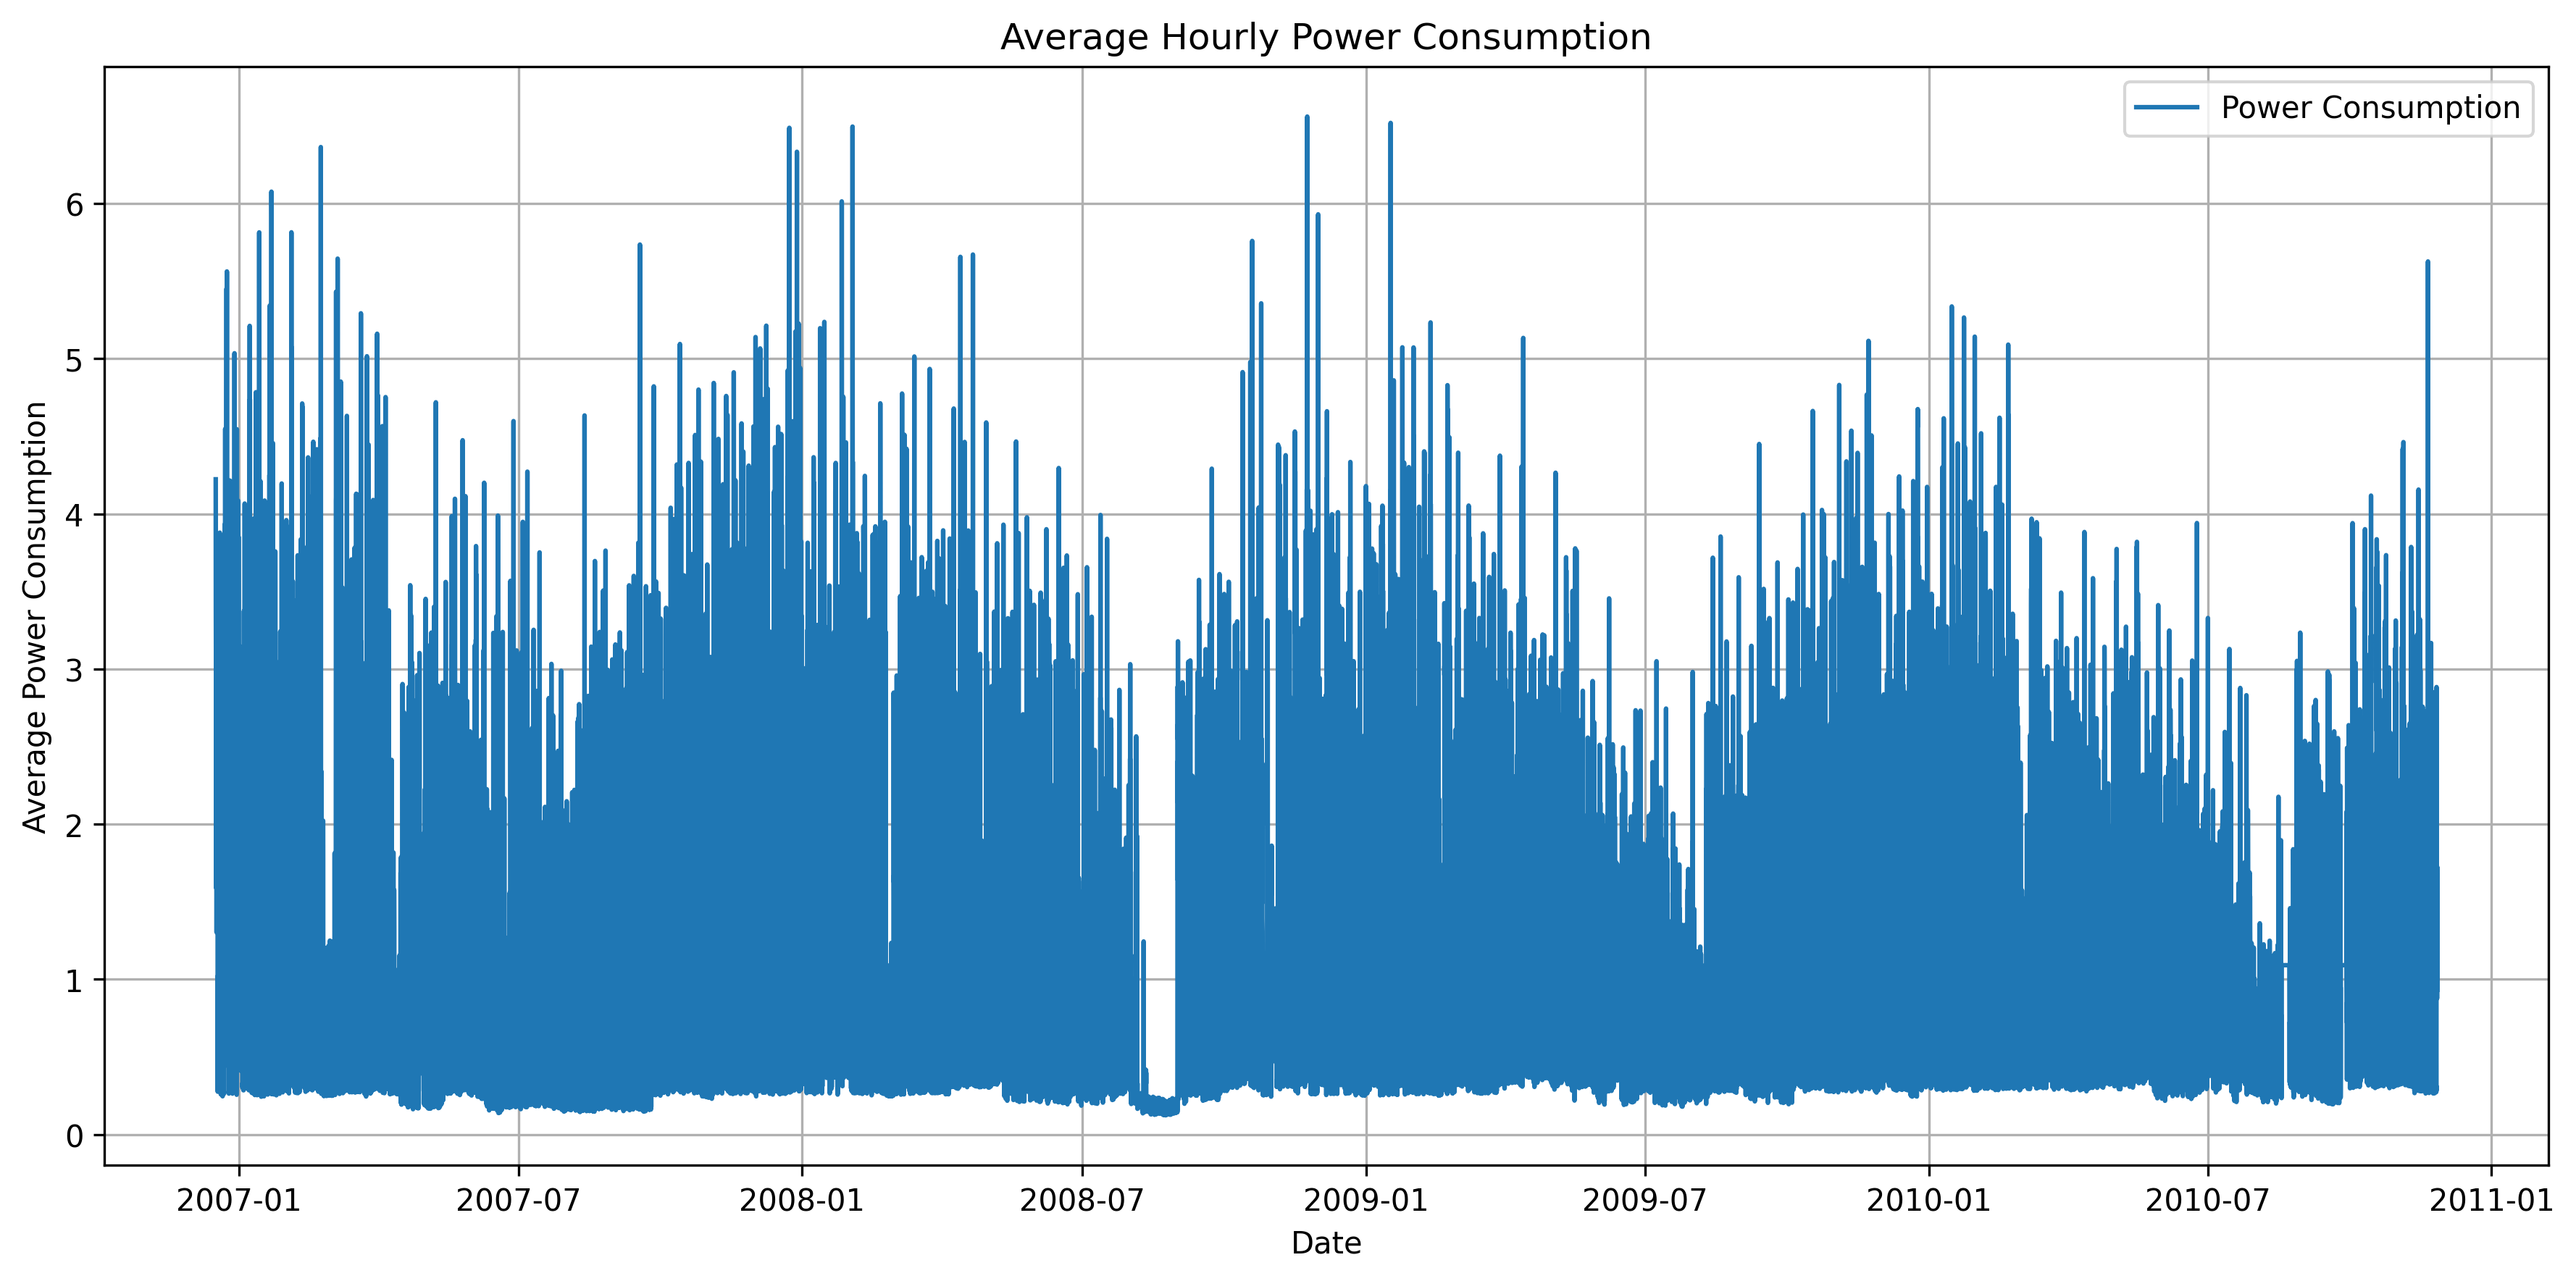

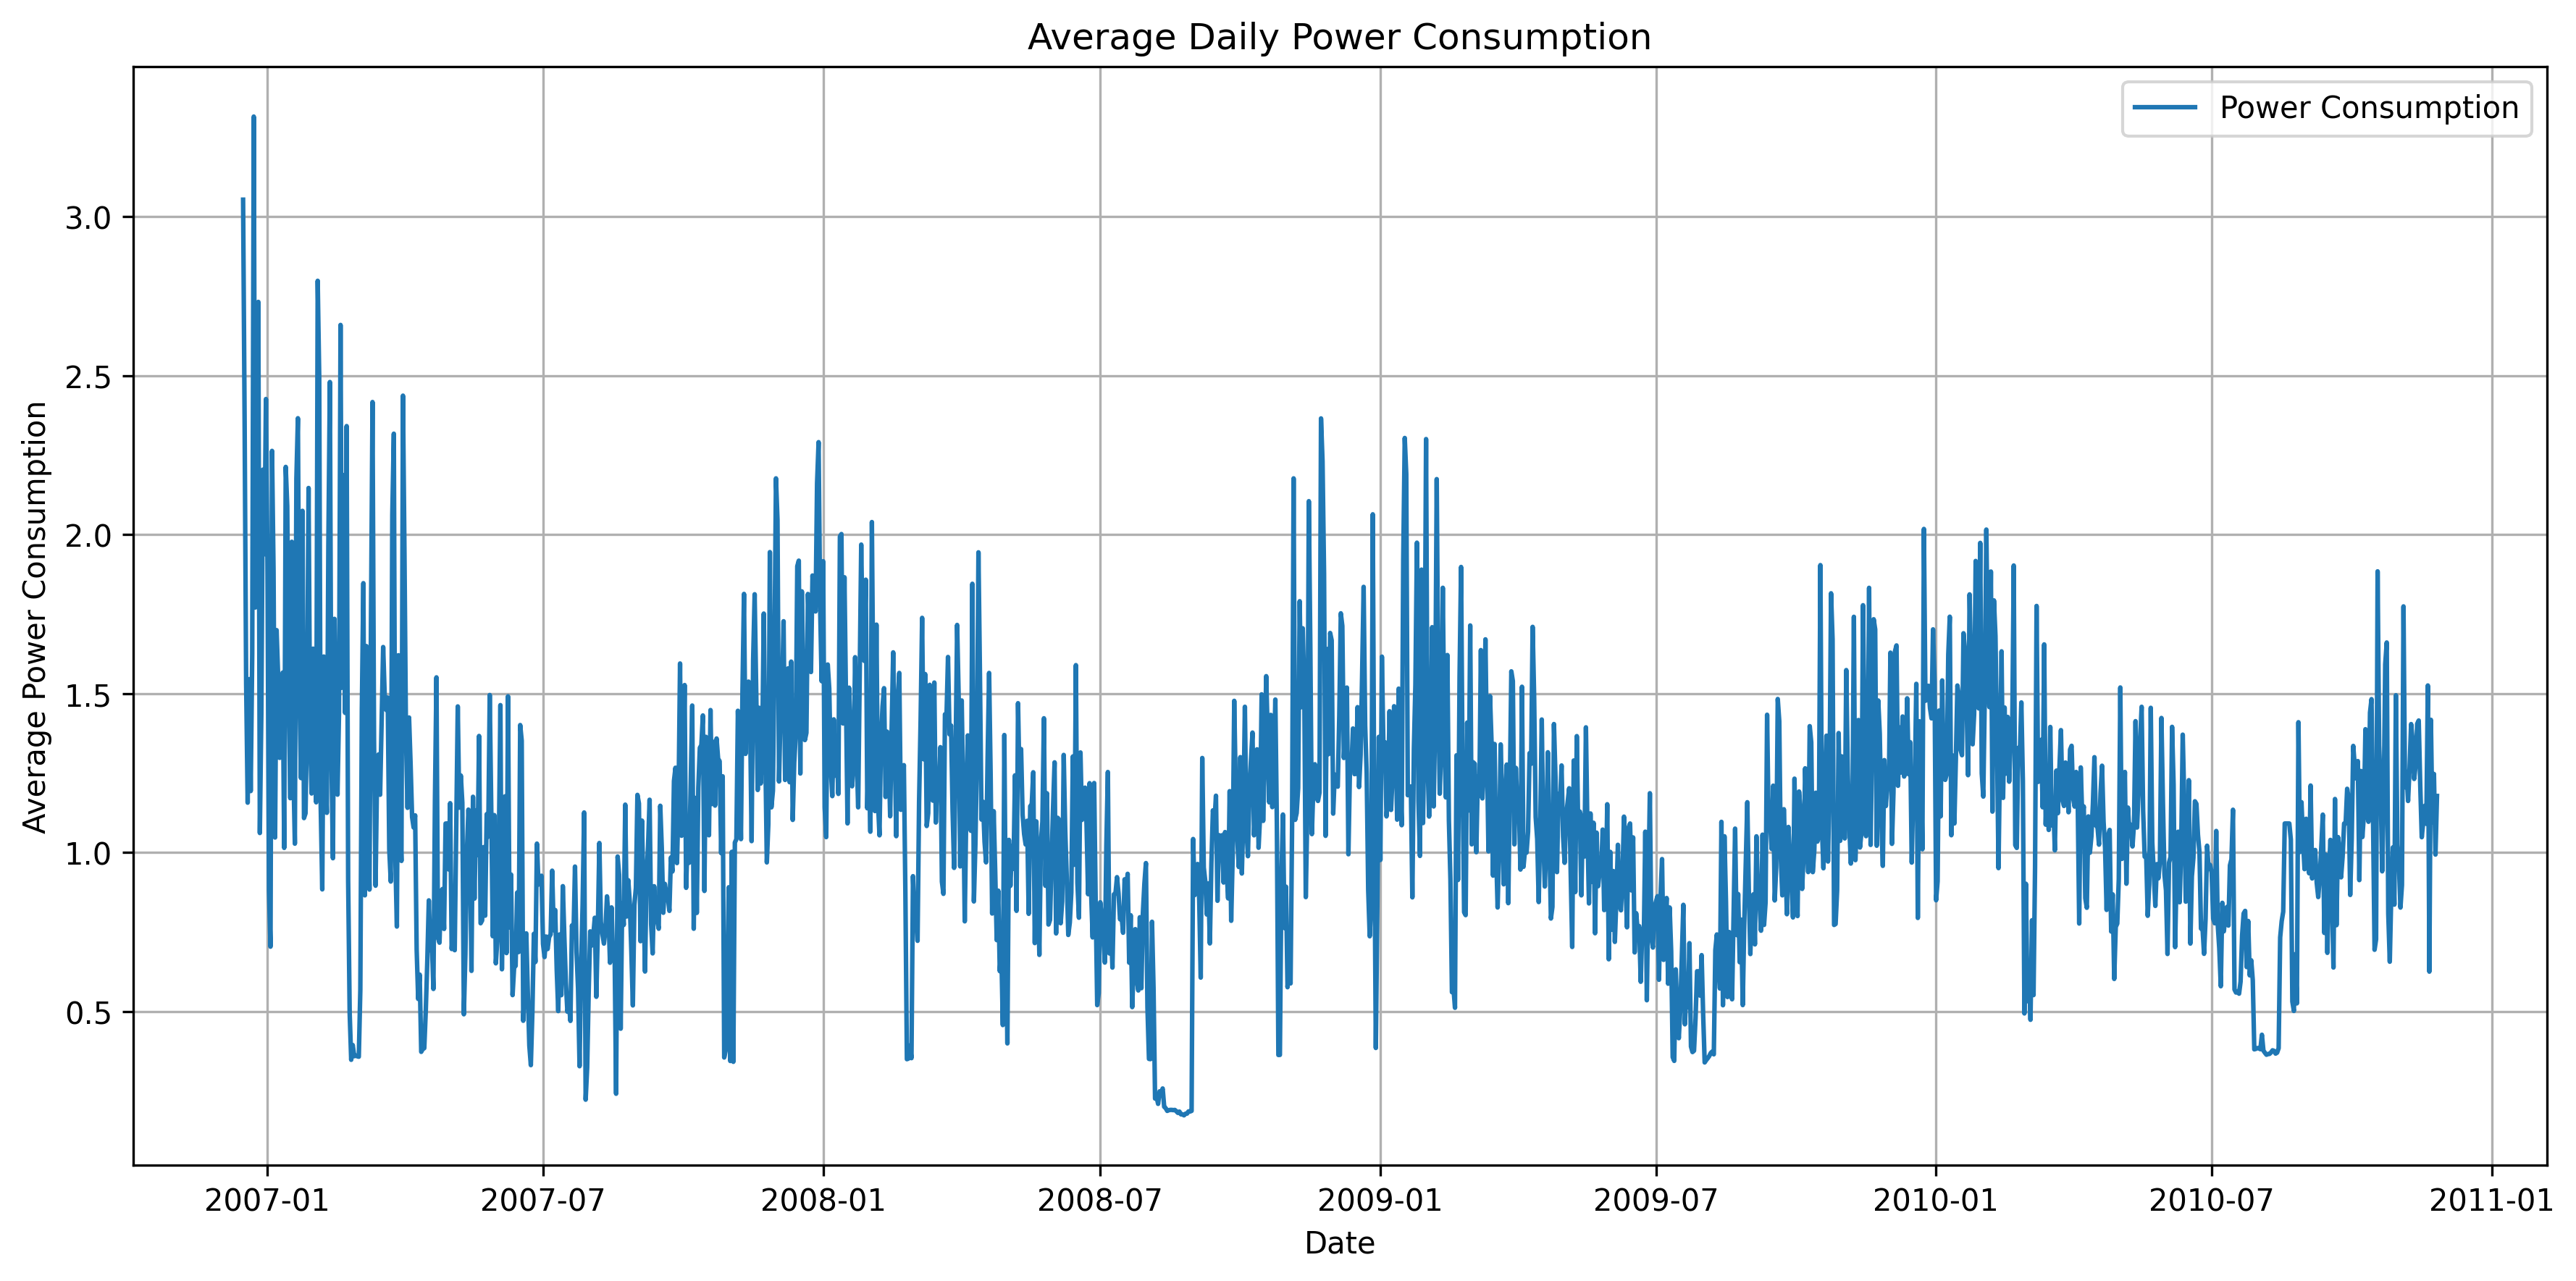

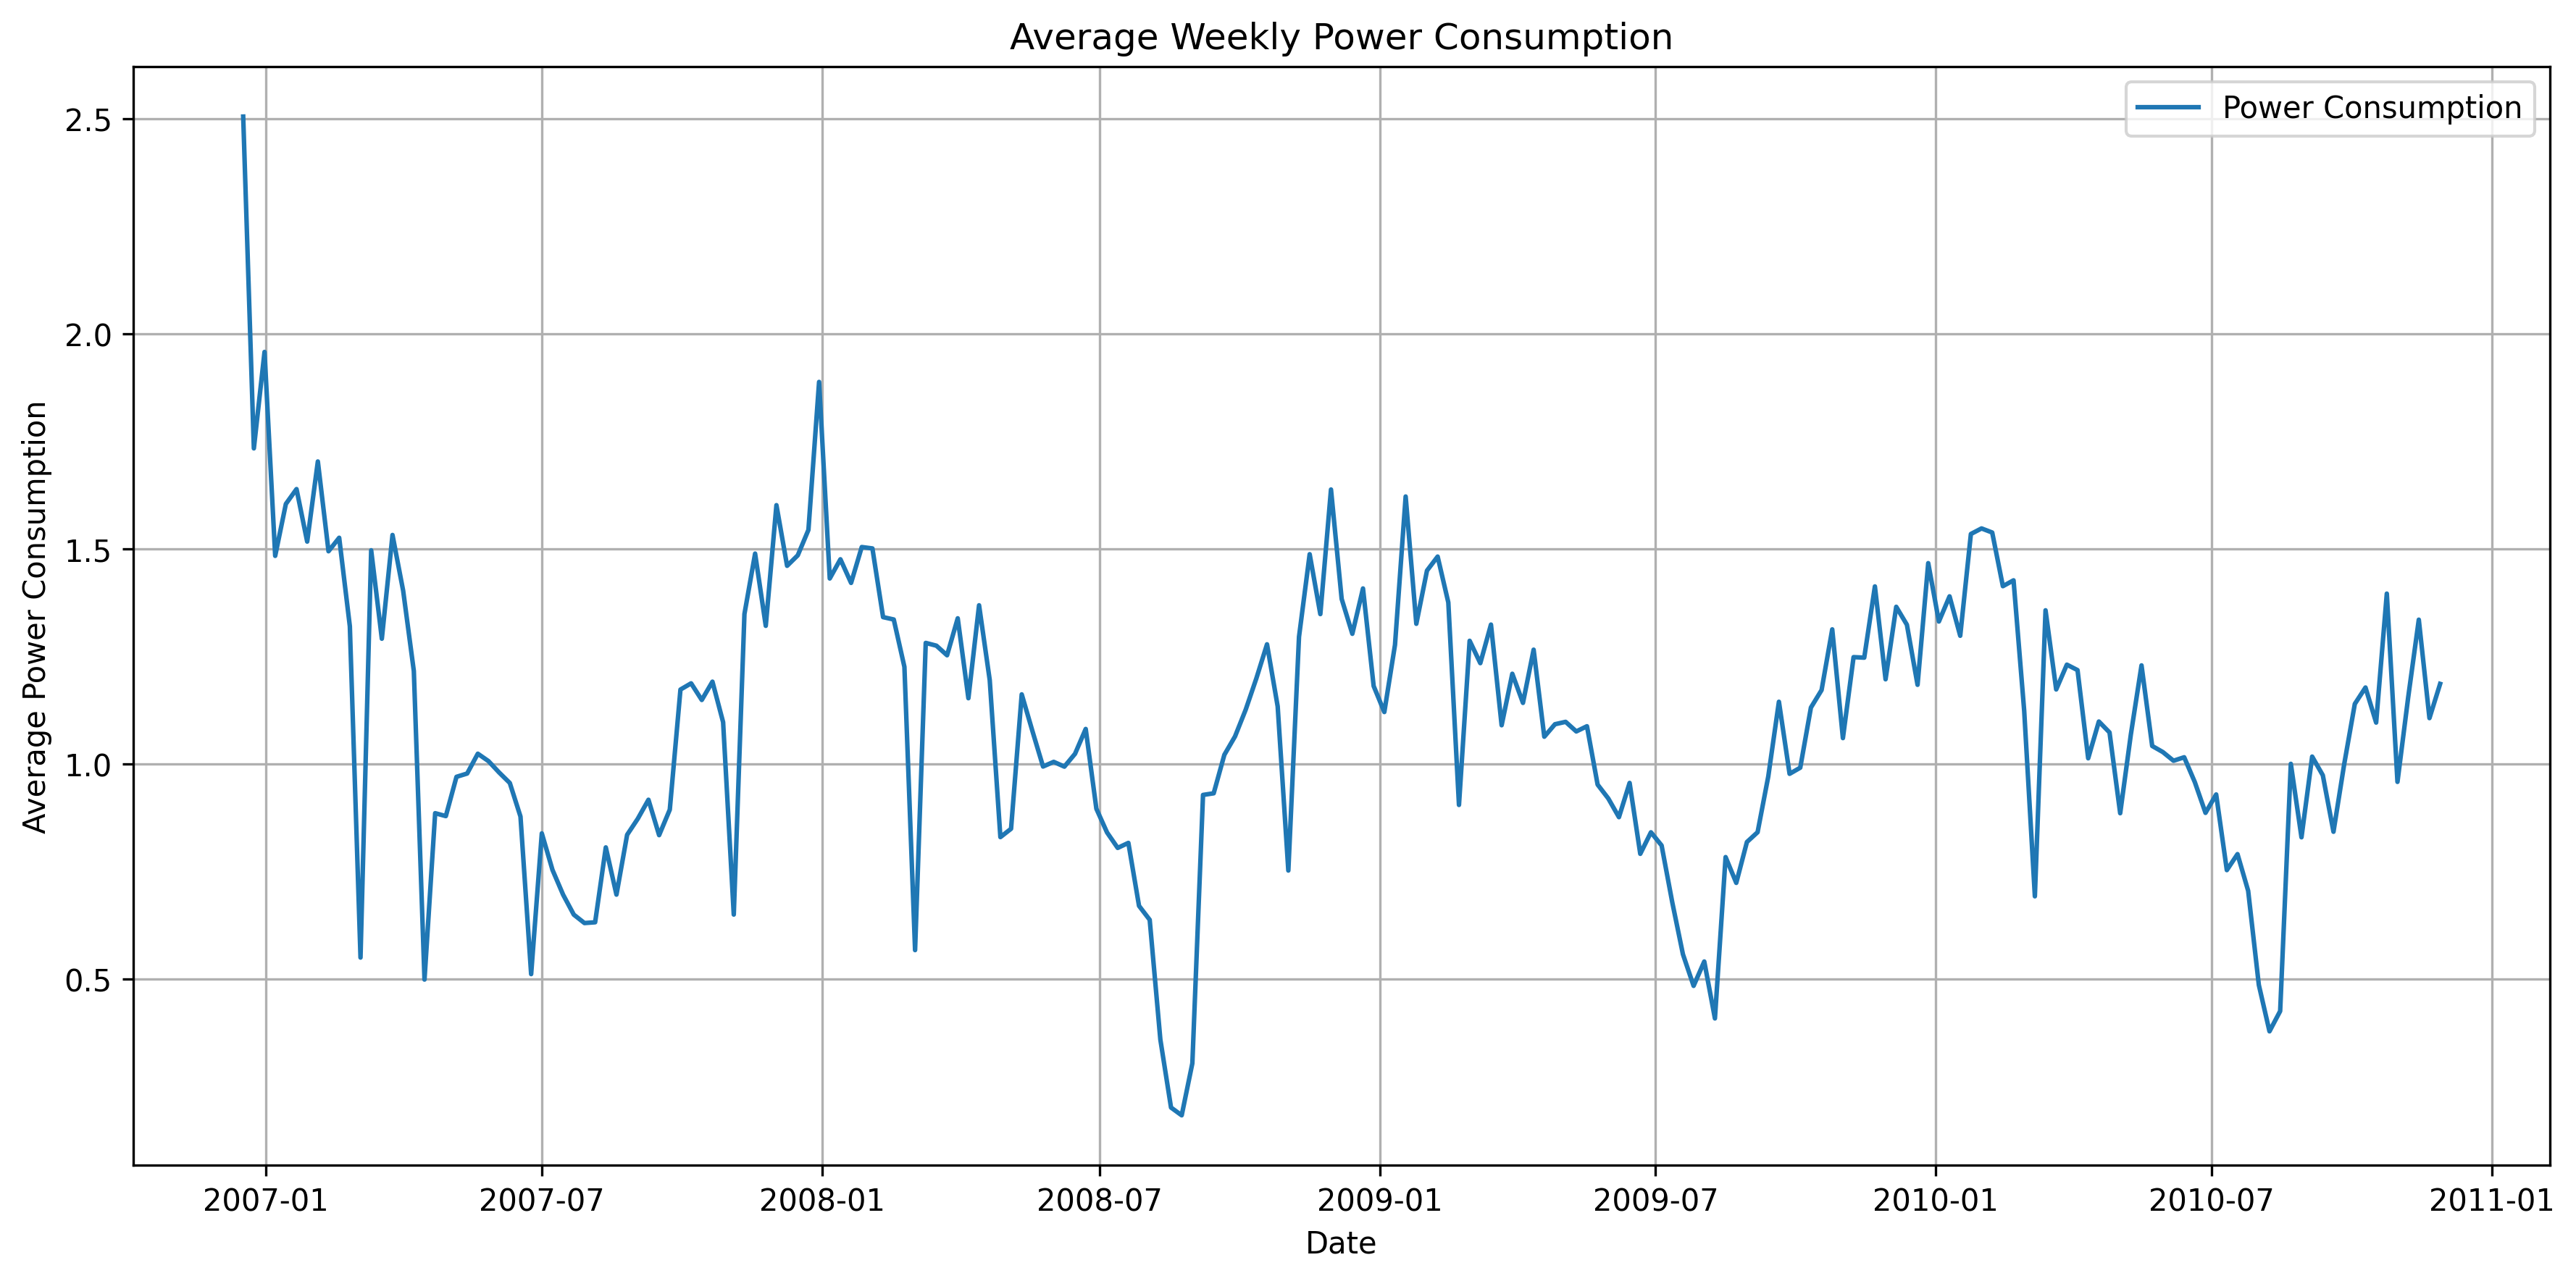

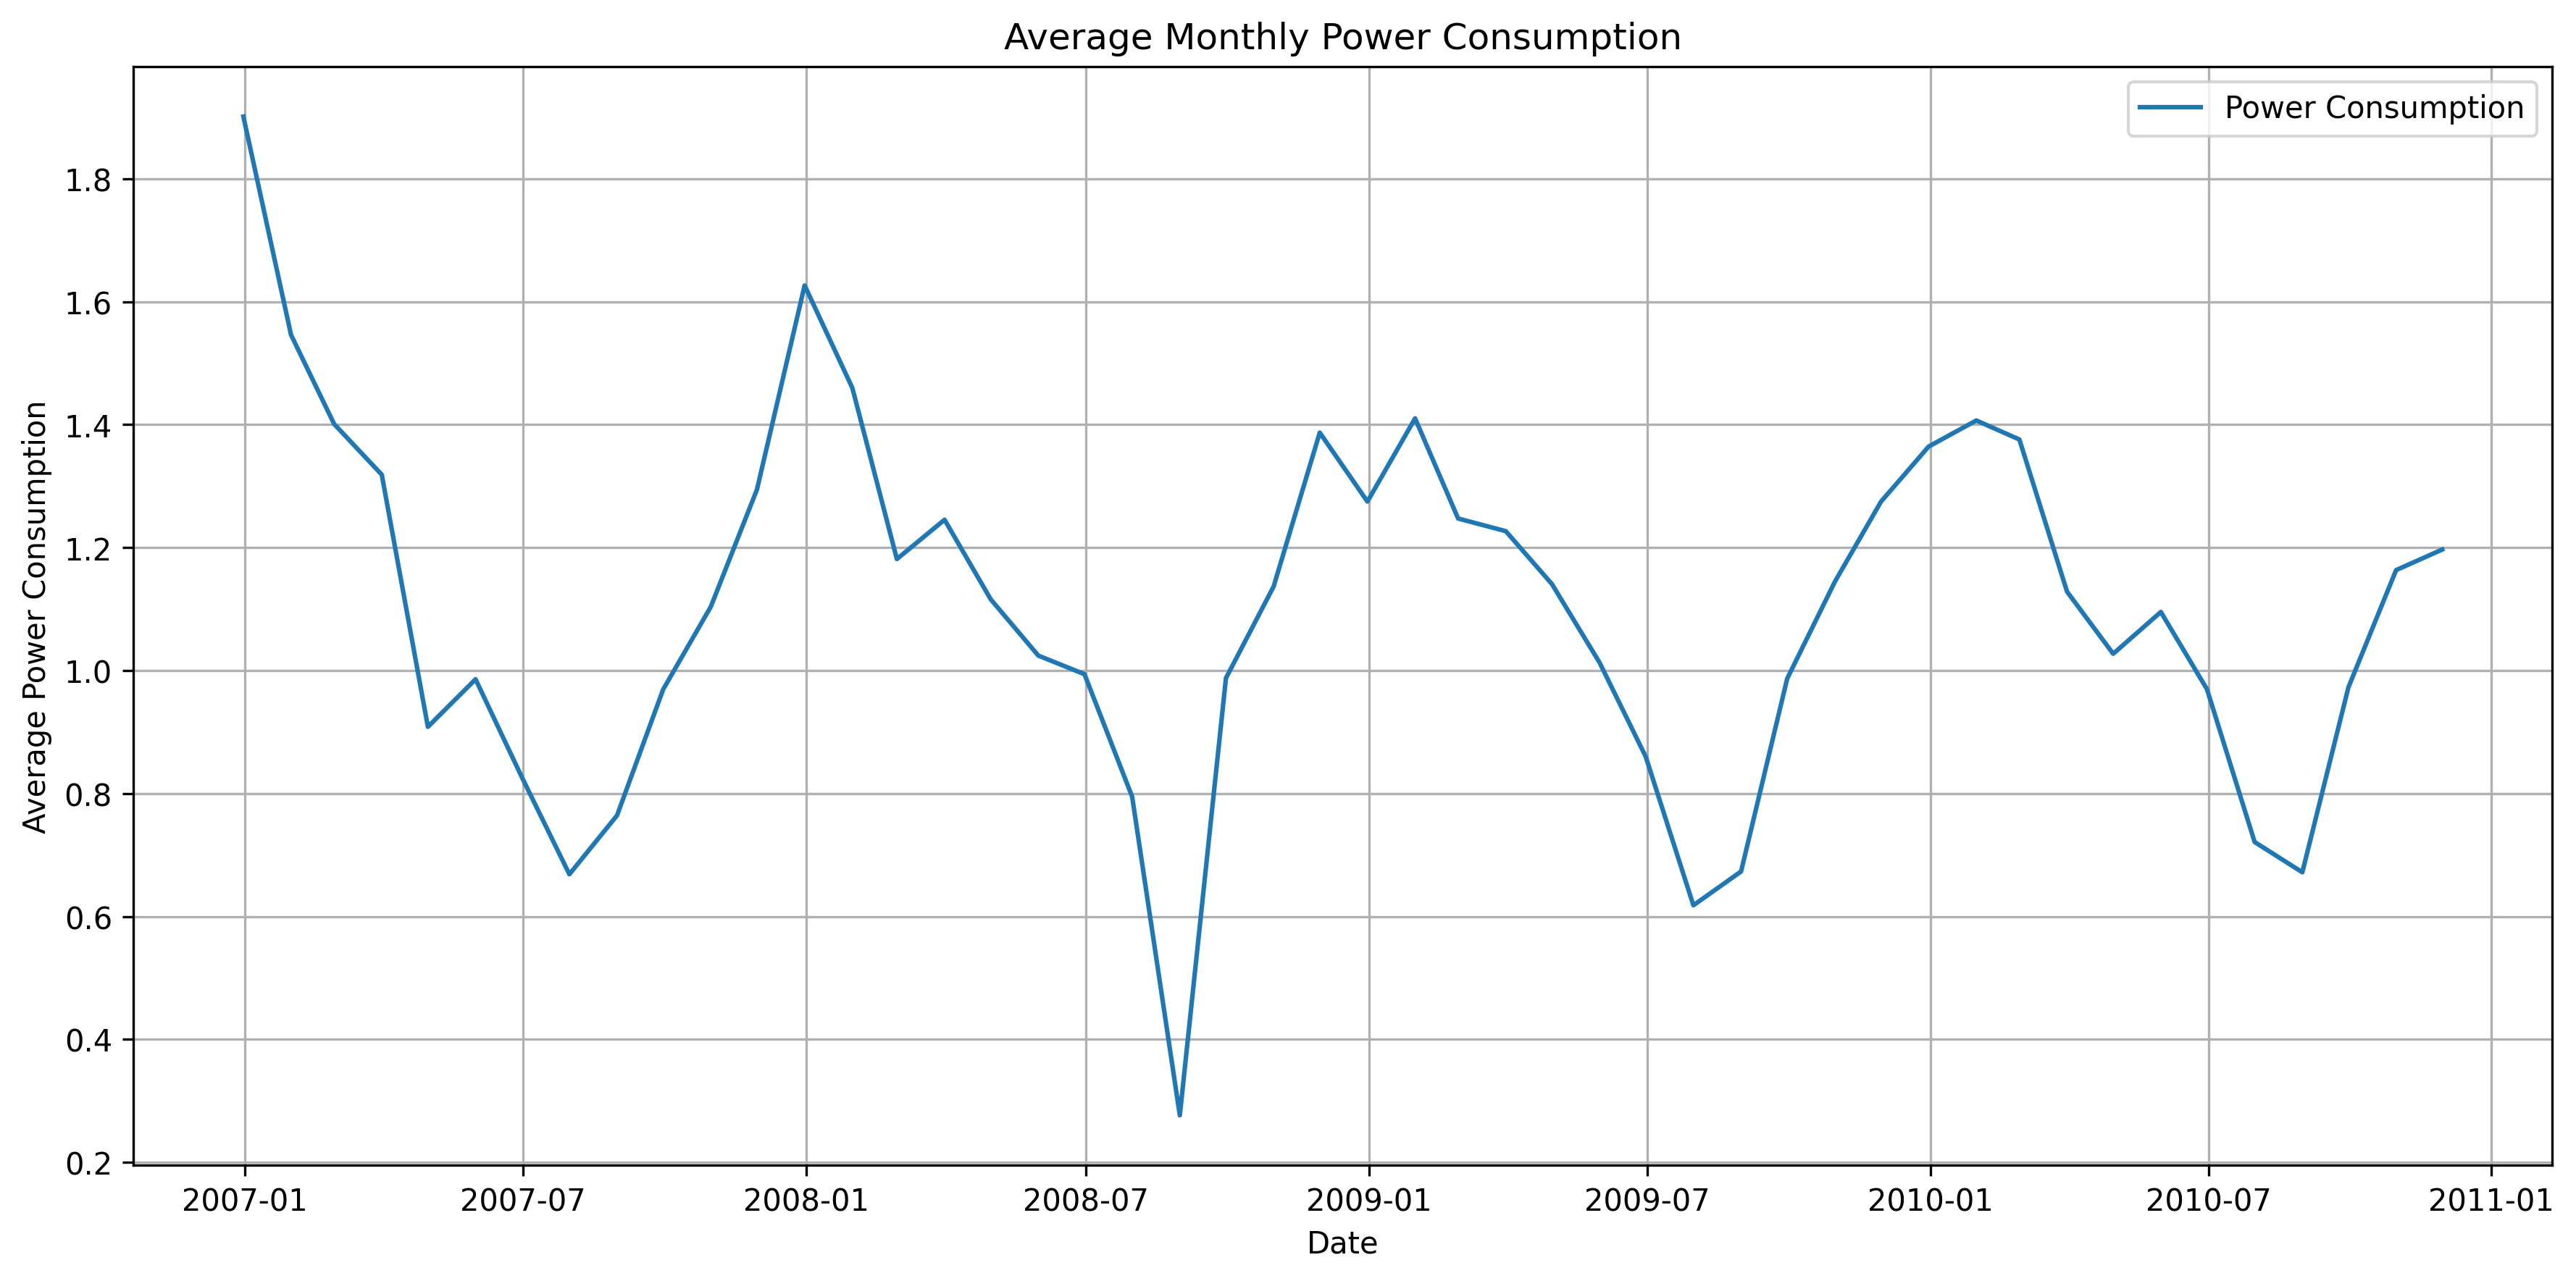

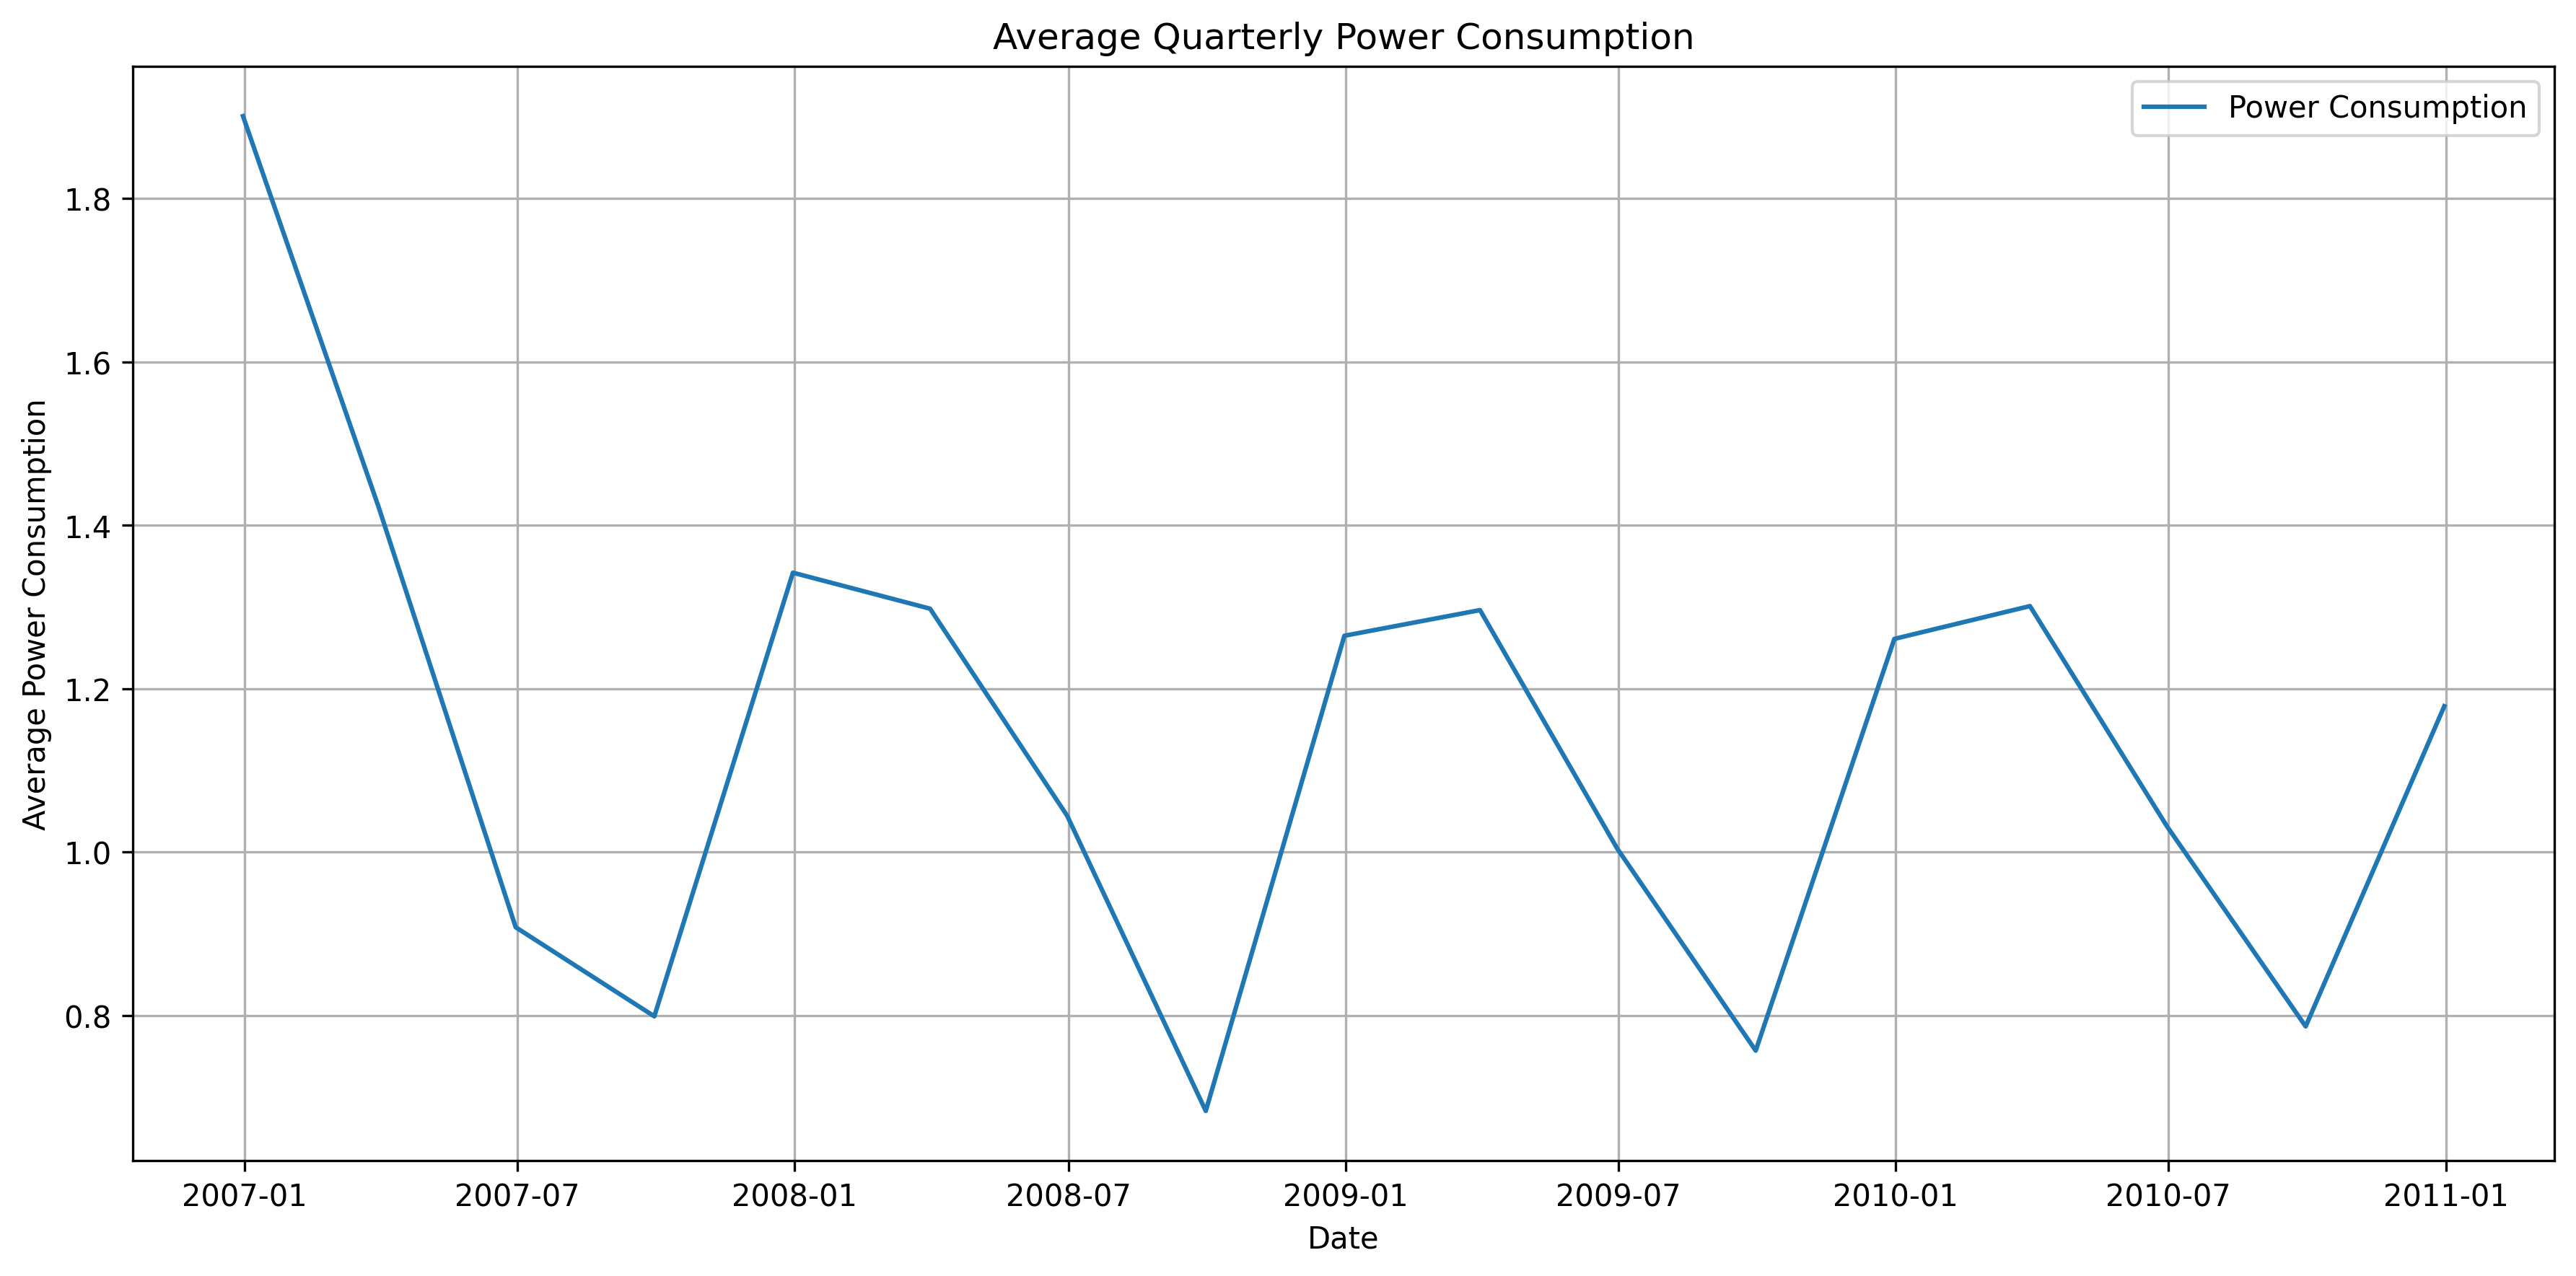

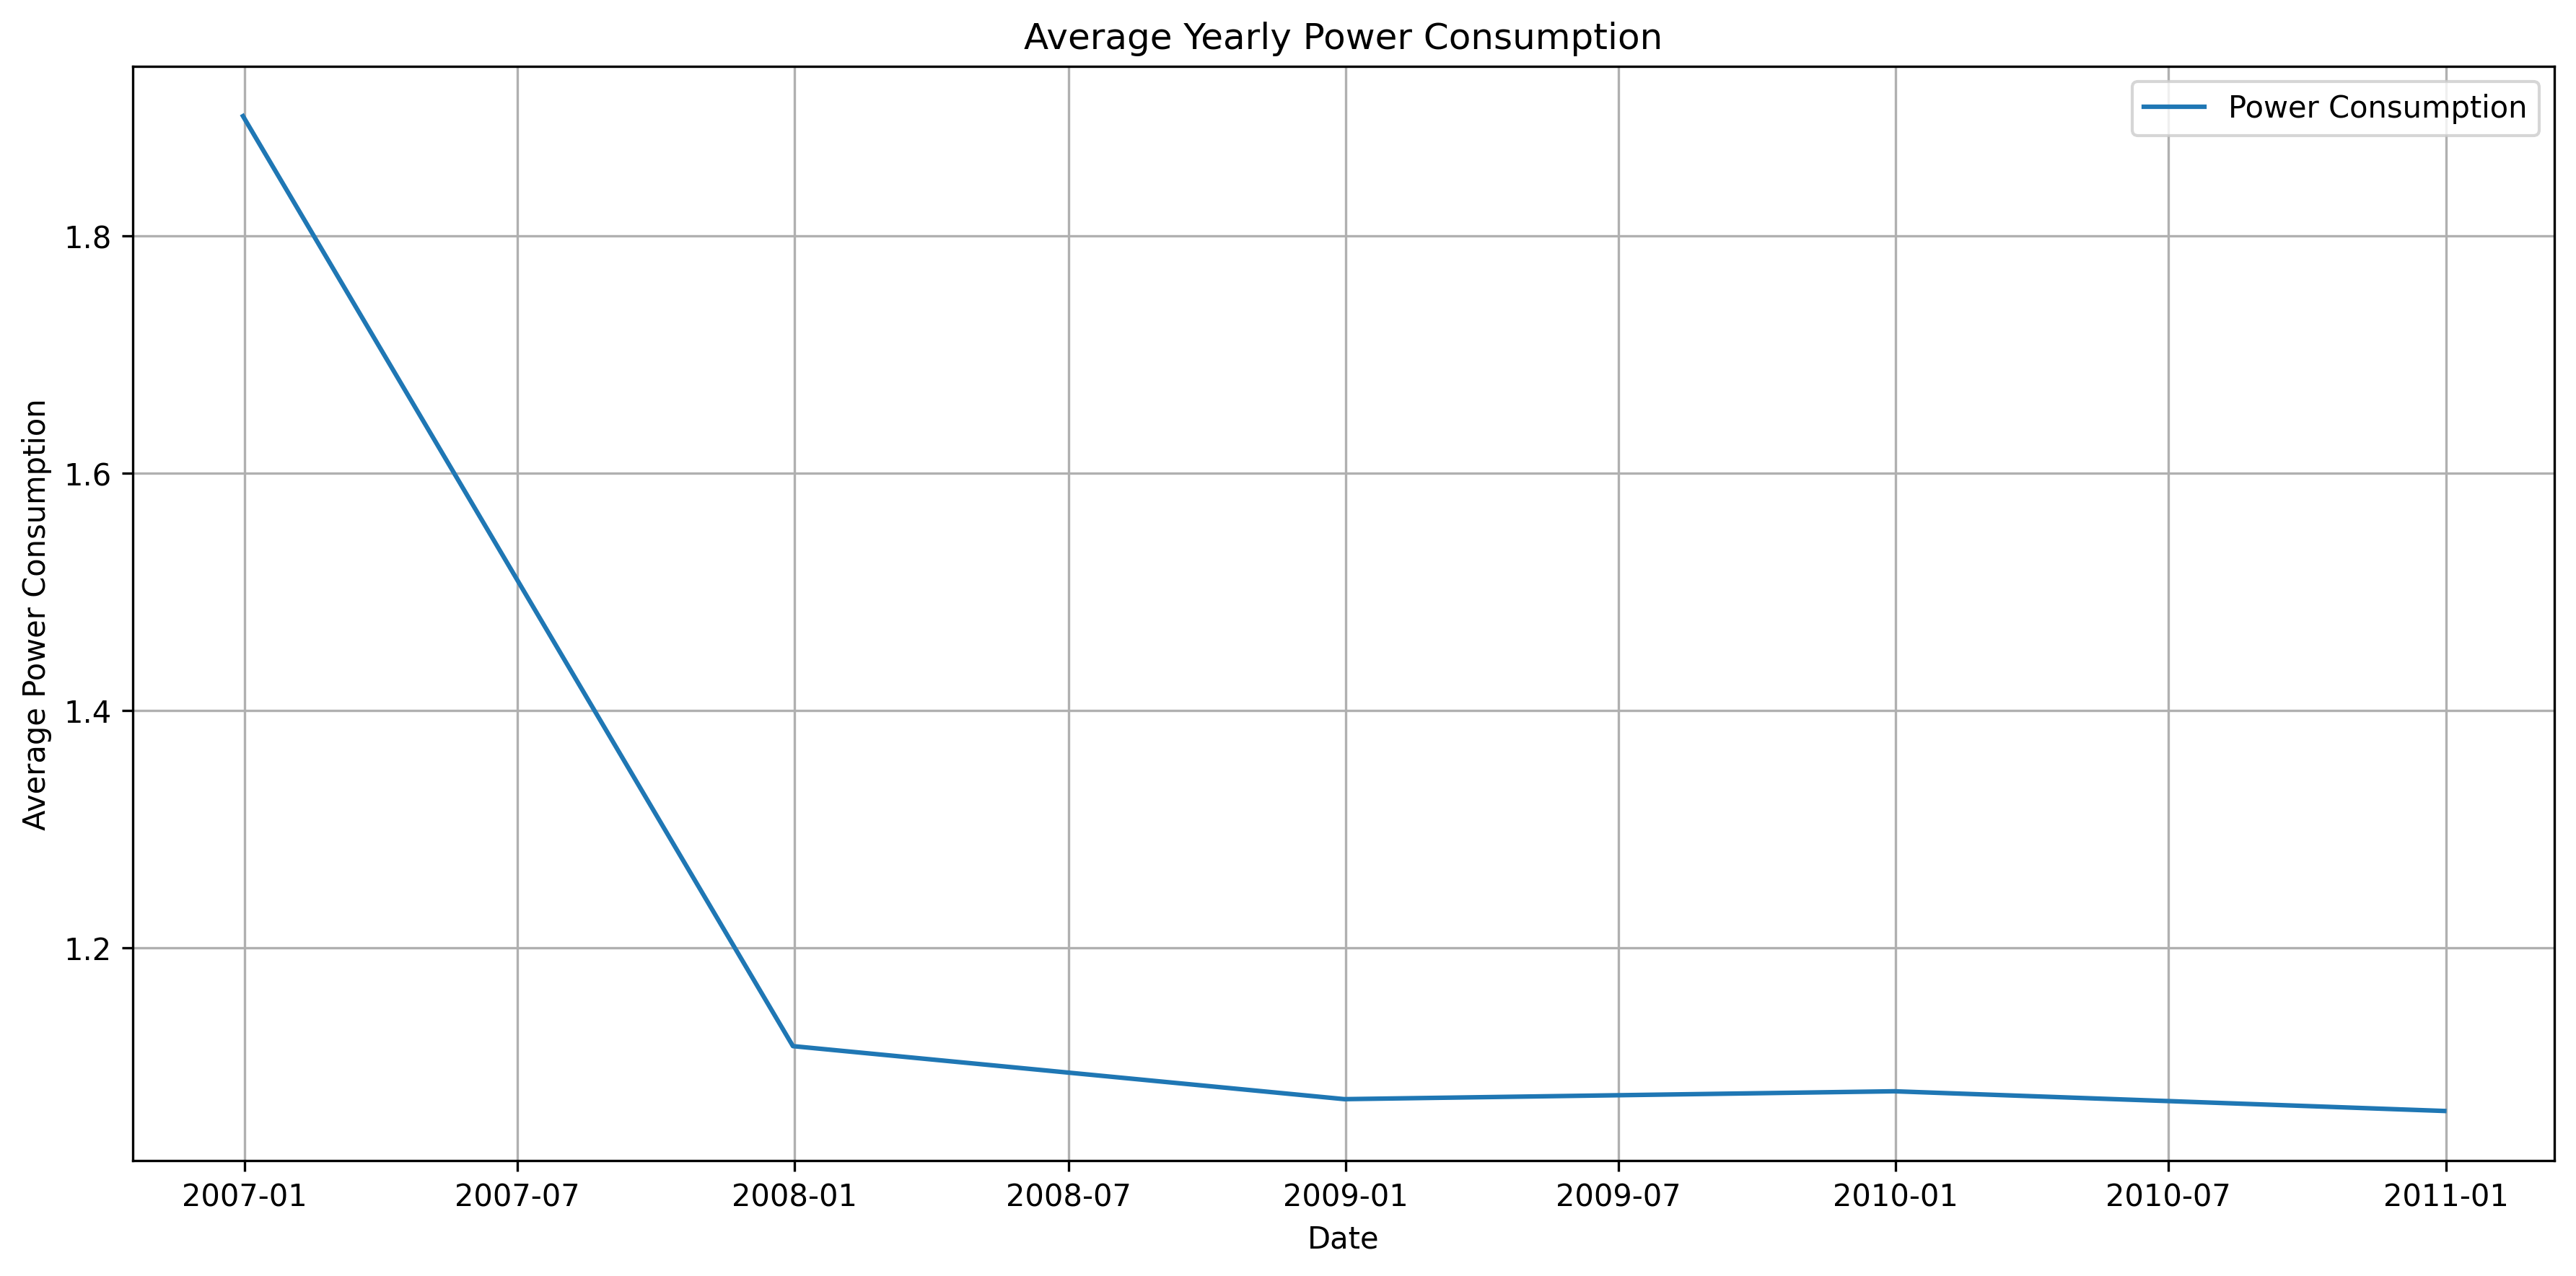

In [ ]:
# Plot hourly, daily, weekly, monthly and yearly Global_active_power
plot_power_consumption(df_hourly.Global_active_power, 'Average Hourly Power Consumption')
plot_power_consumption(df_daily.Global_active_power, 'Average Daily Power Consumption')
plot_power_consumption(df_weekly.Global_active_power, 'Average Weekly Power Consumption')
plot_power_consumption(df_monthly.Global_active_power, 'Average Monthly Power Consumption')
plot_power_consumption(df_quarterly.Global_active_power, 'Average Quarterly Power Consumption')
plot_power_consumption(df_yearly.Global_active_power, 'Average Yearly Power Consumption')

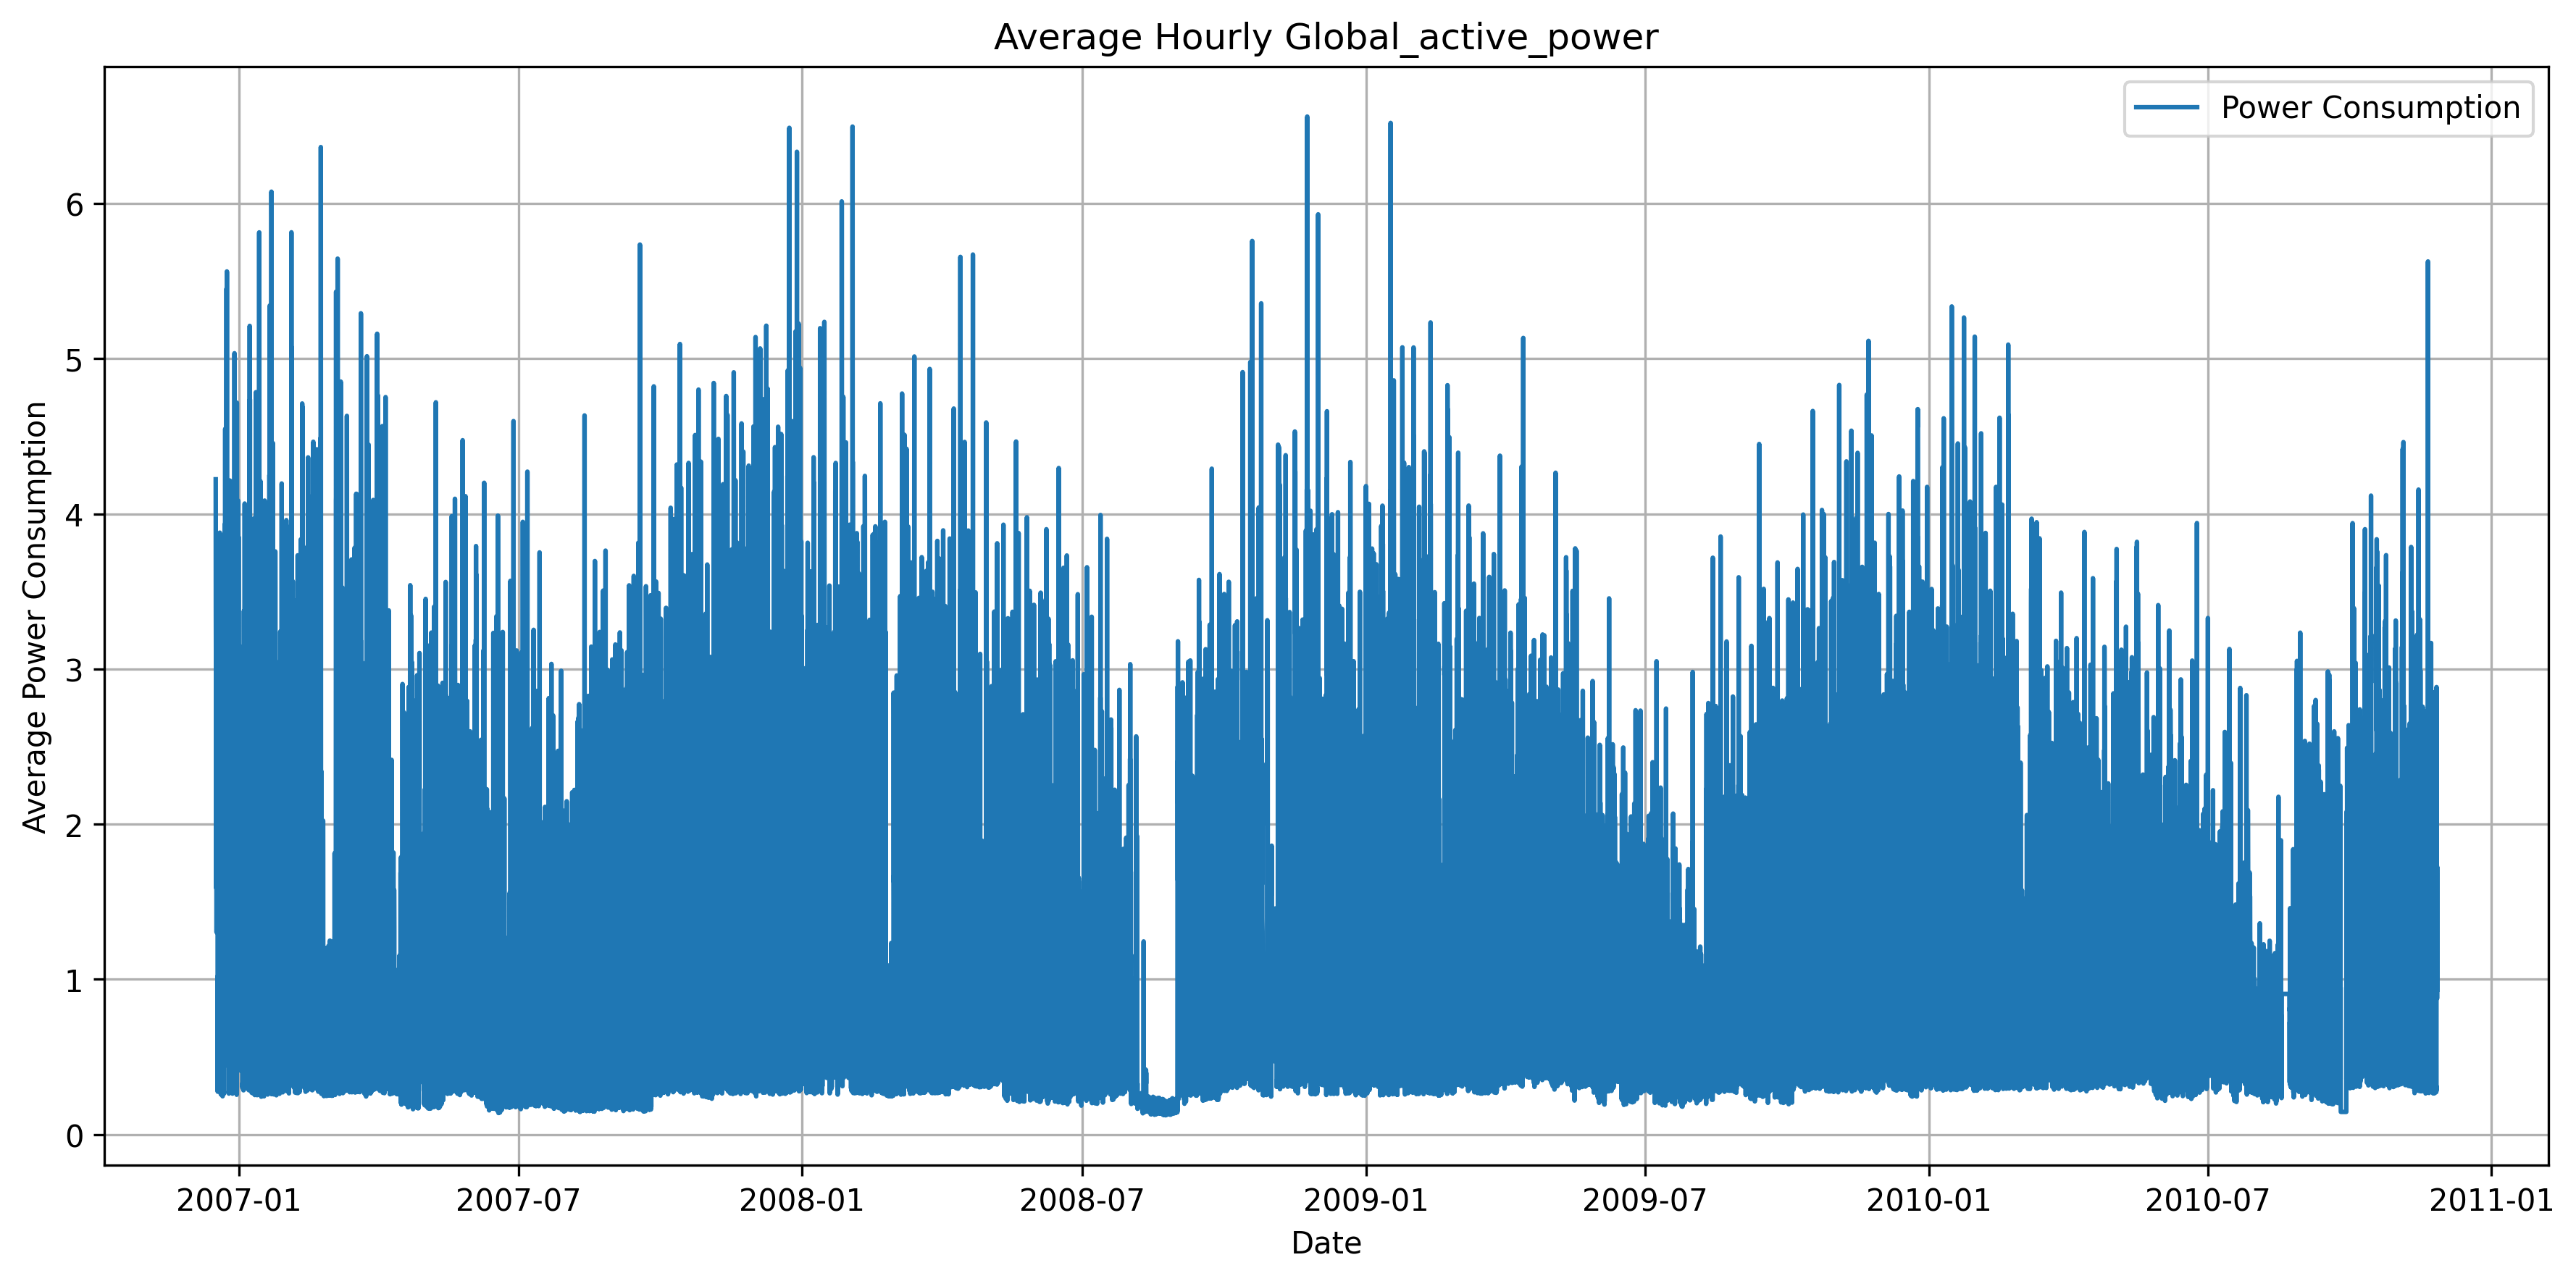

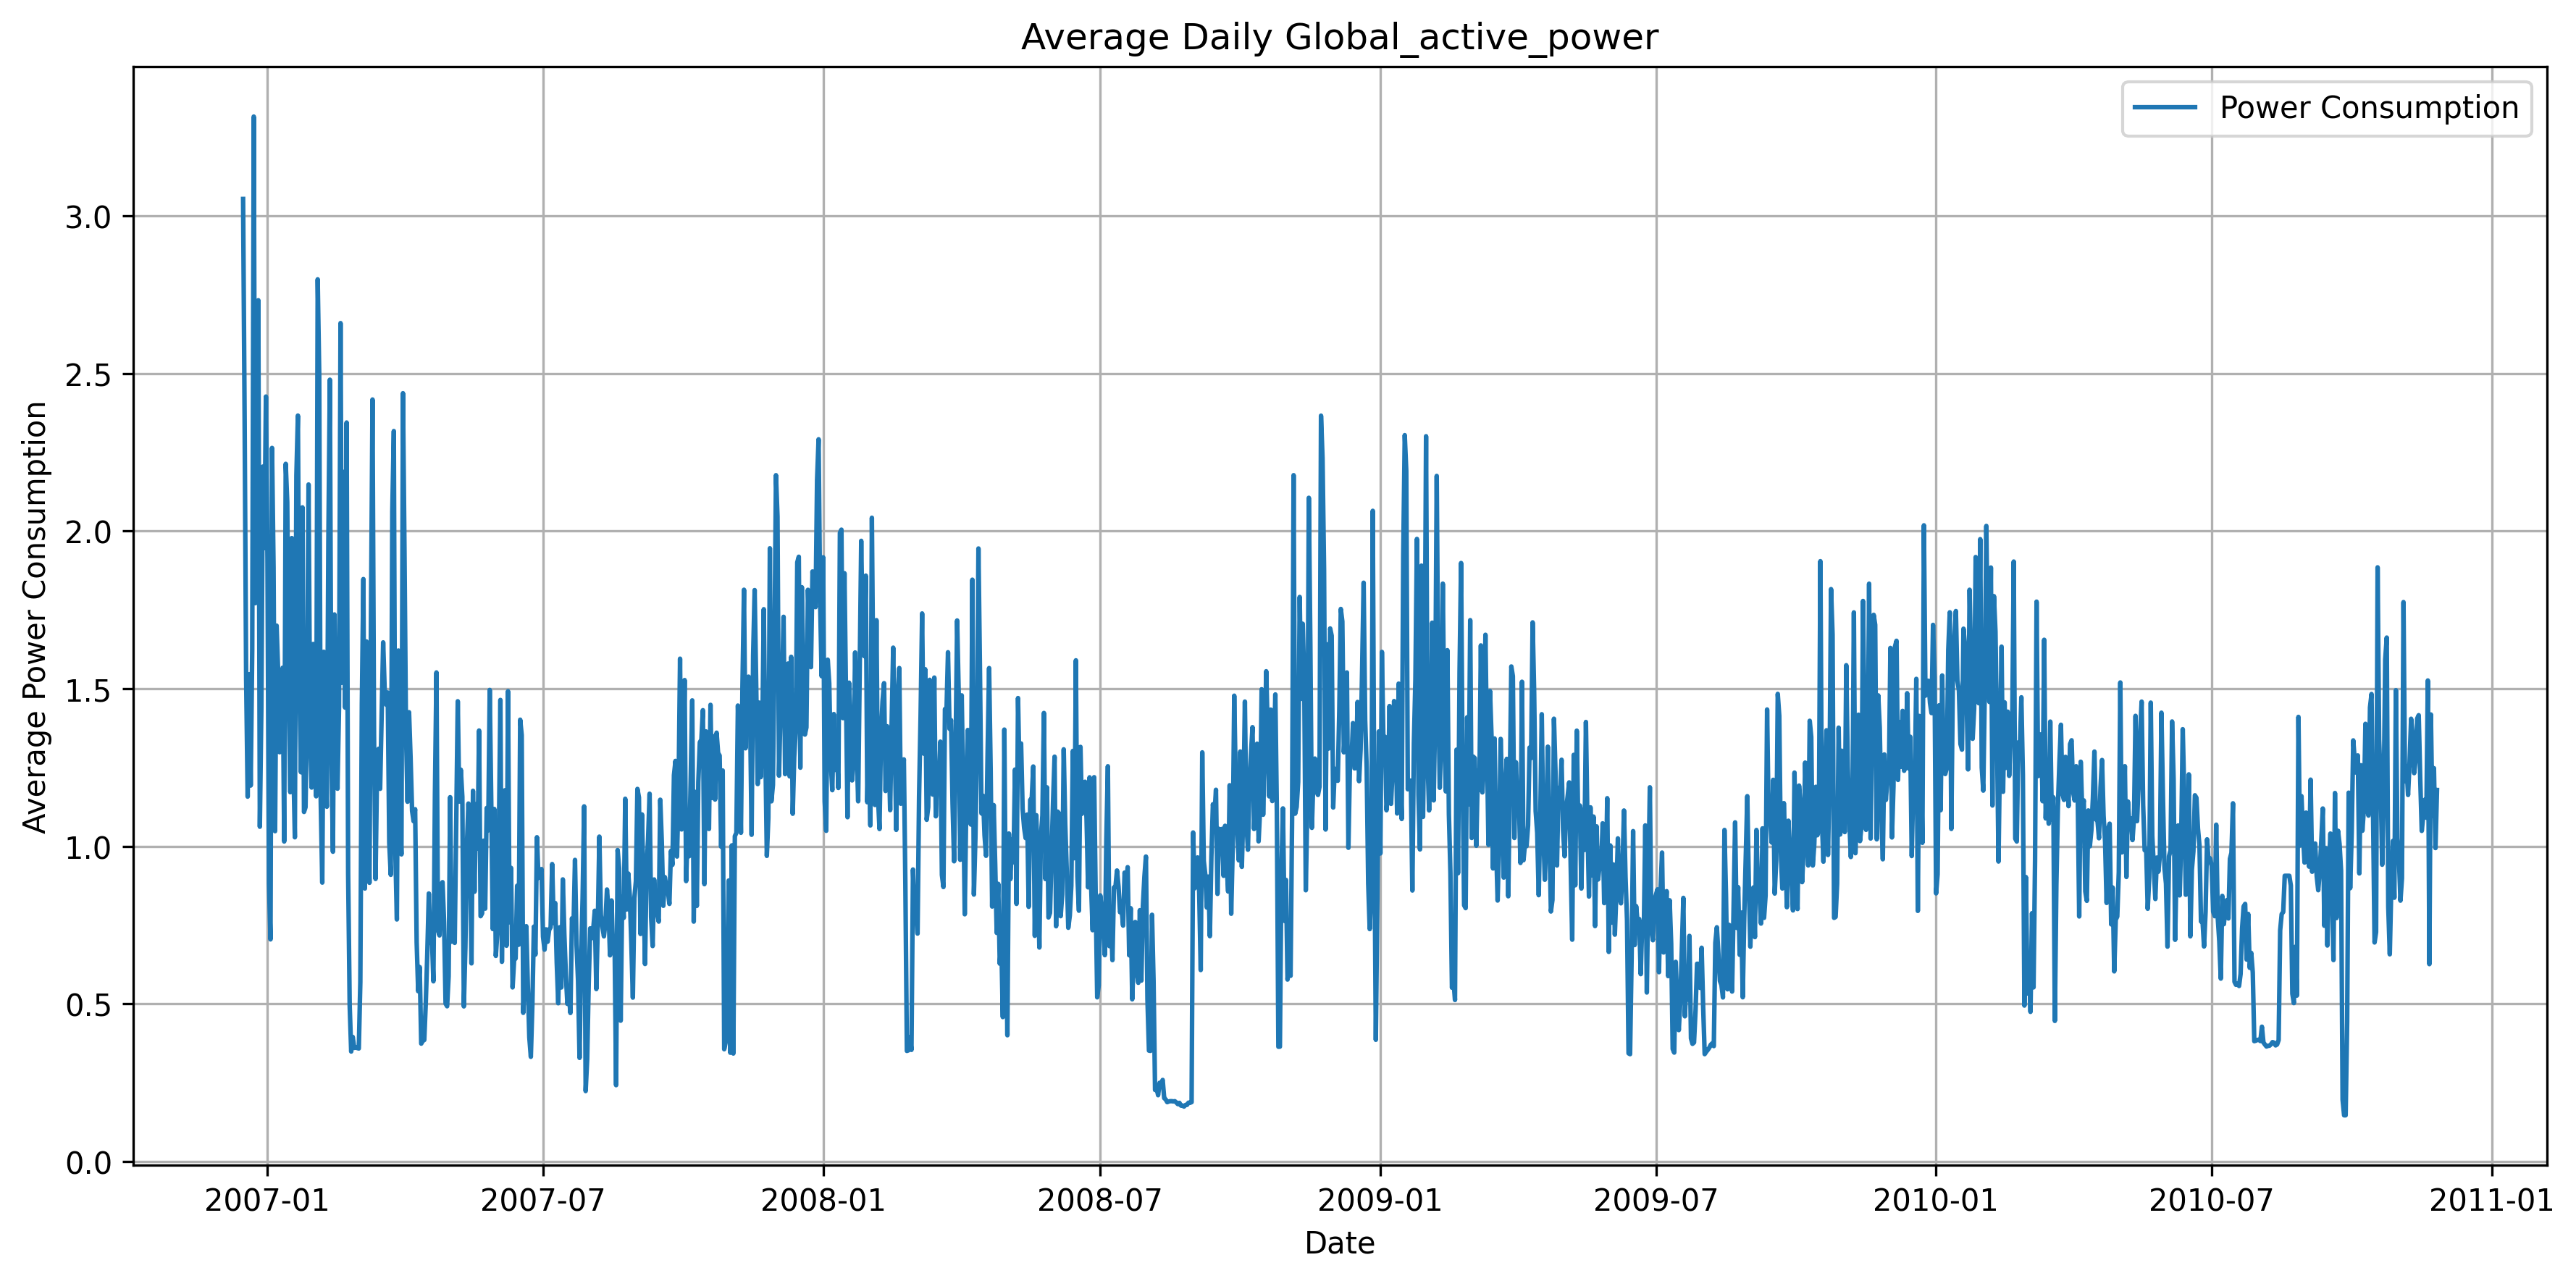

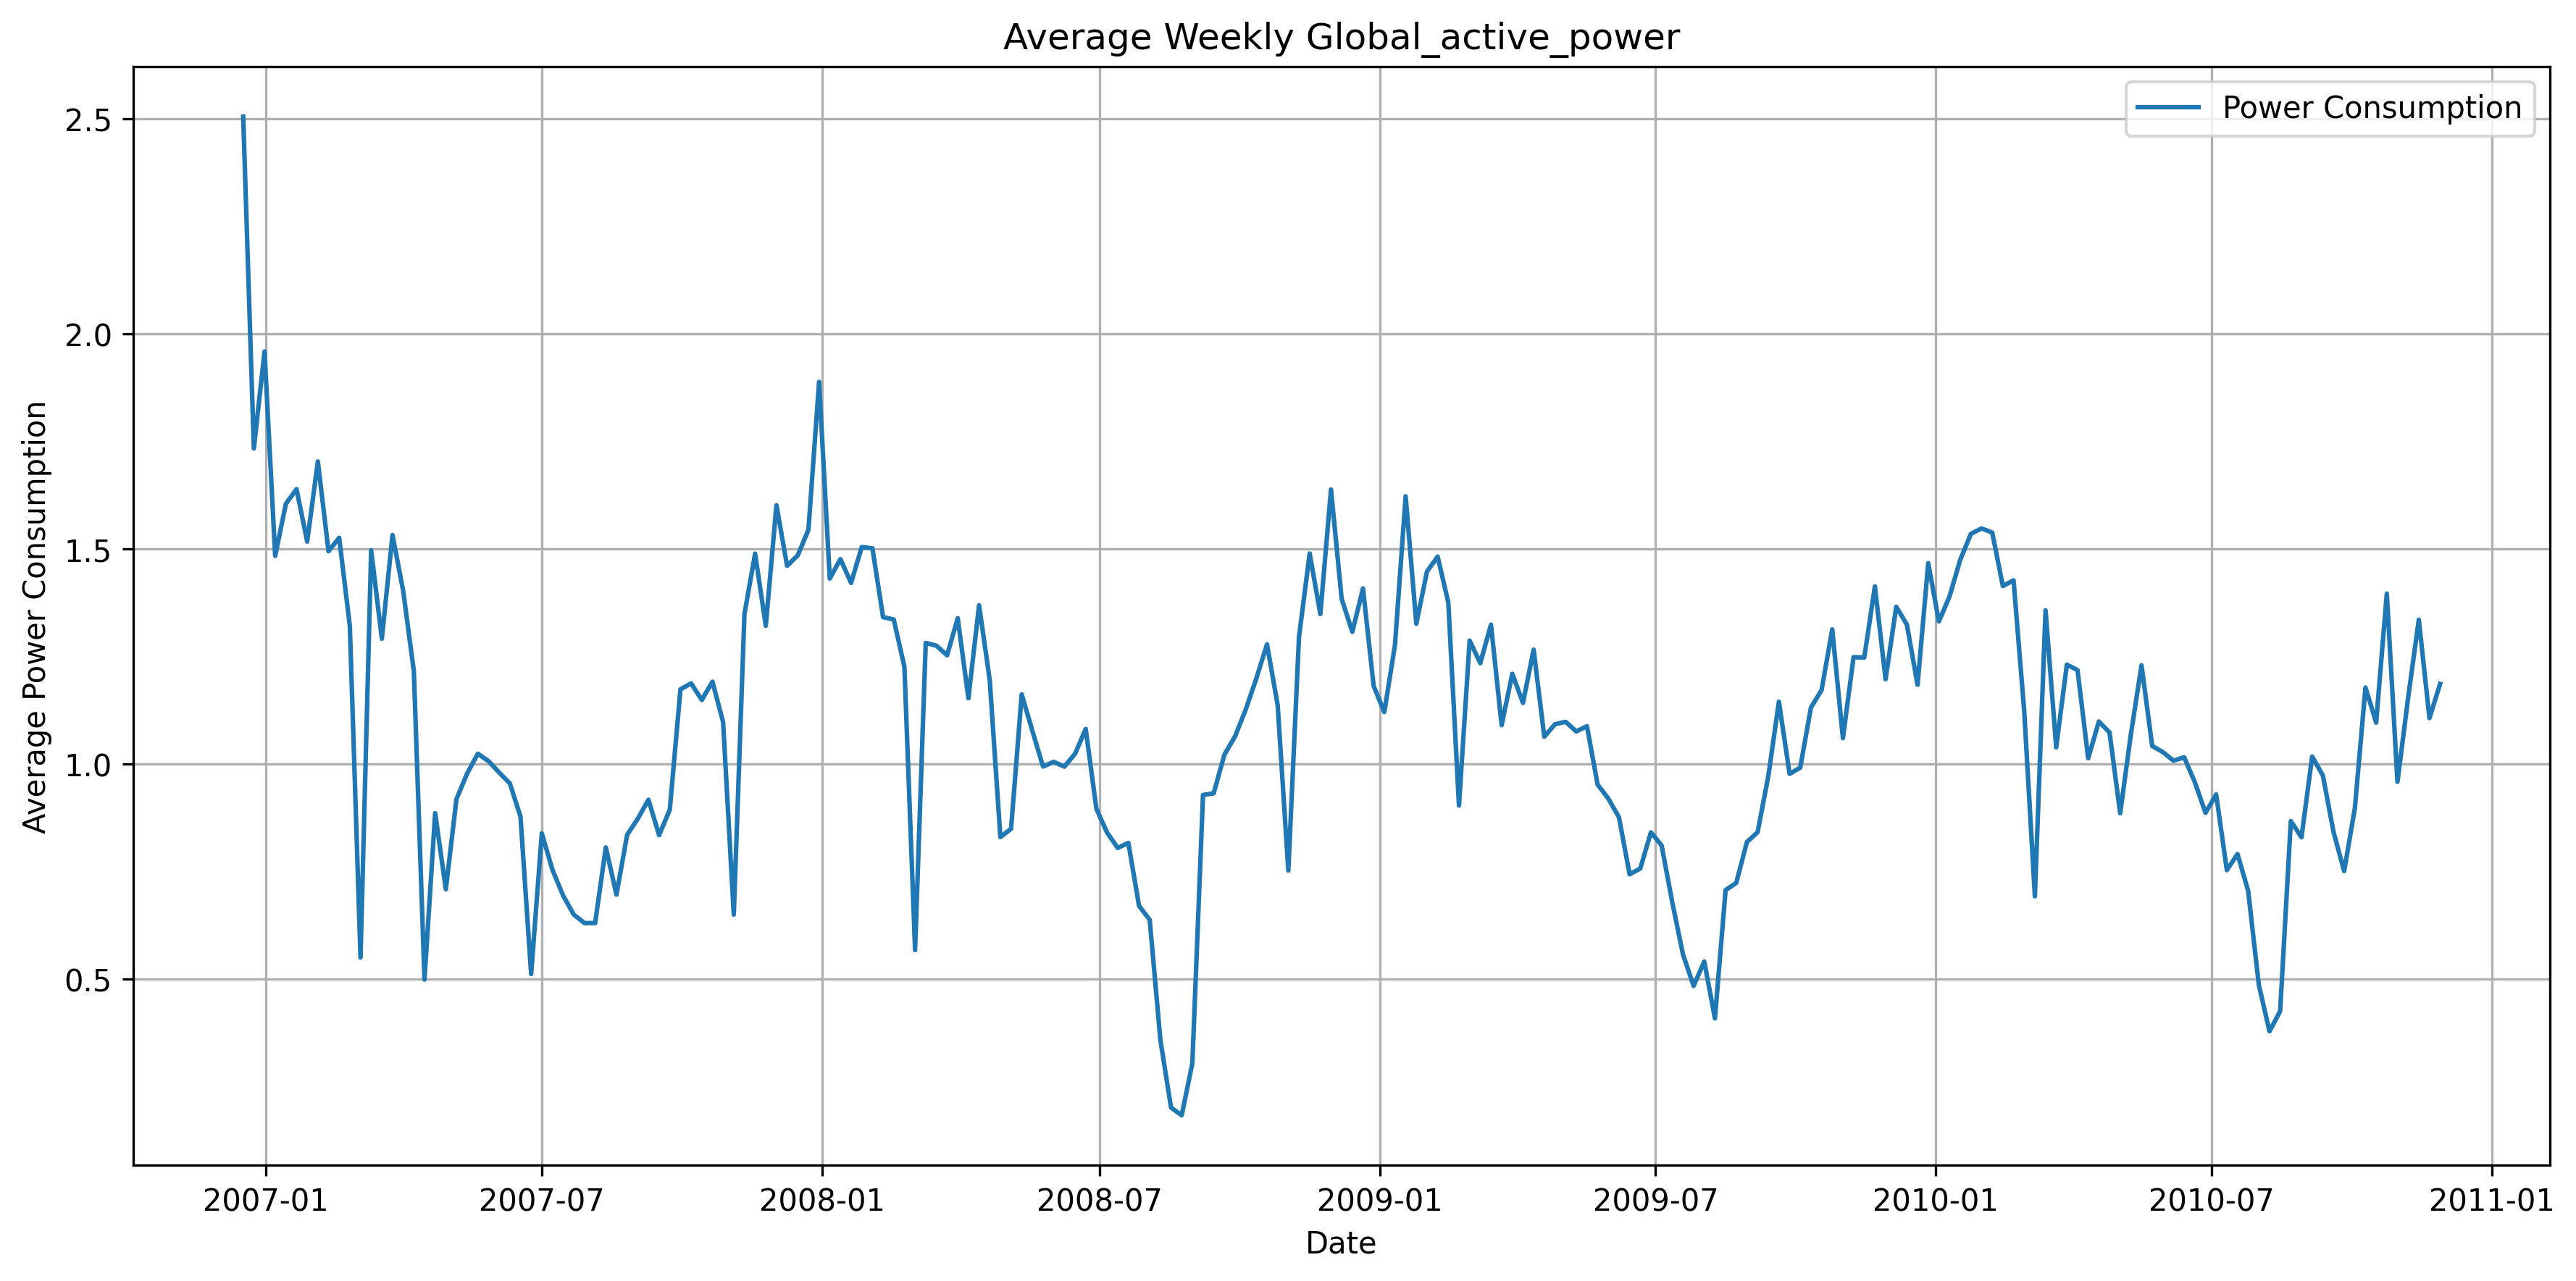

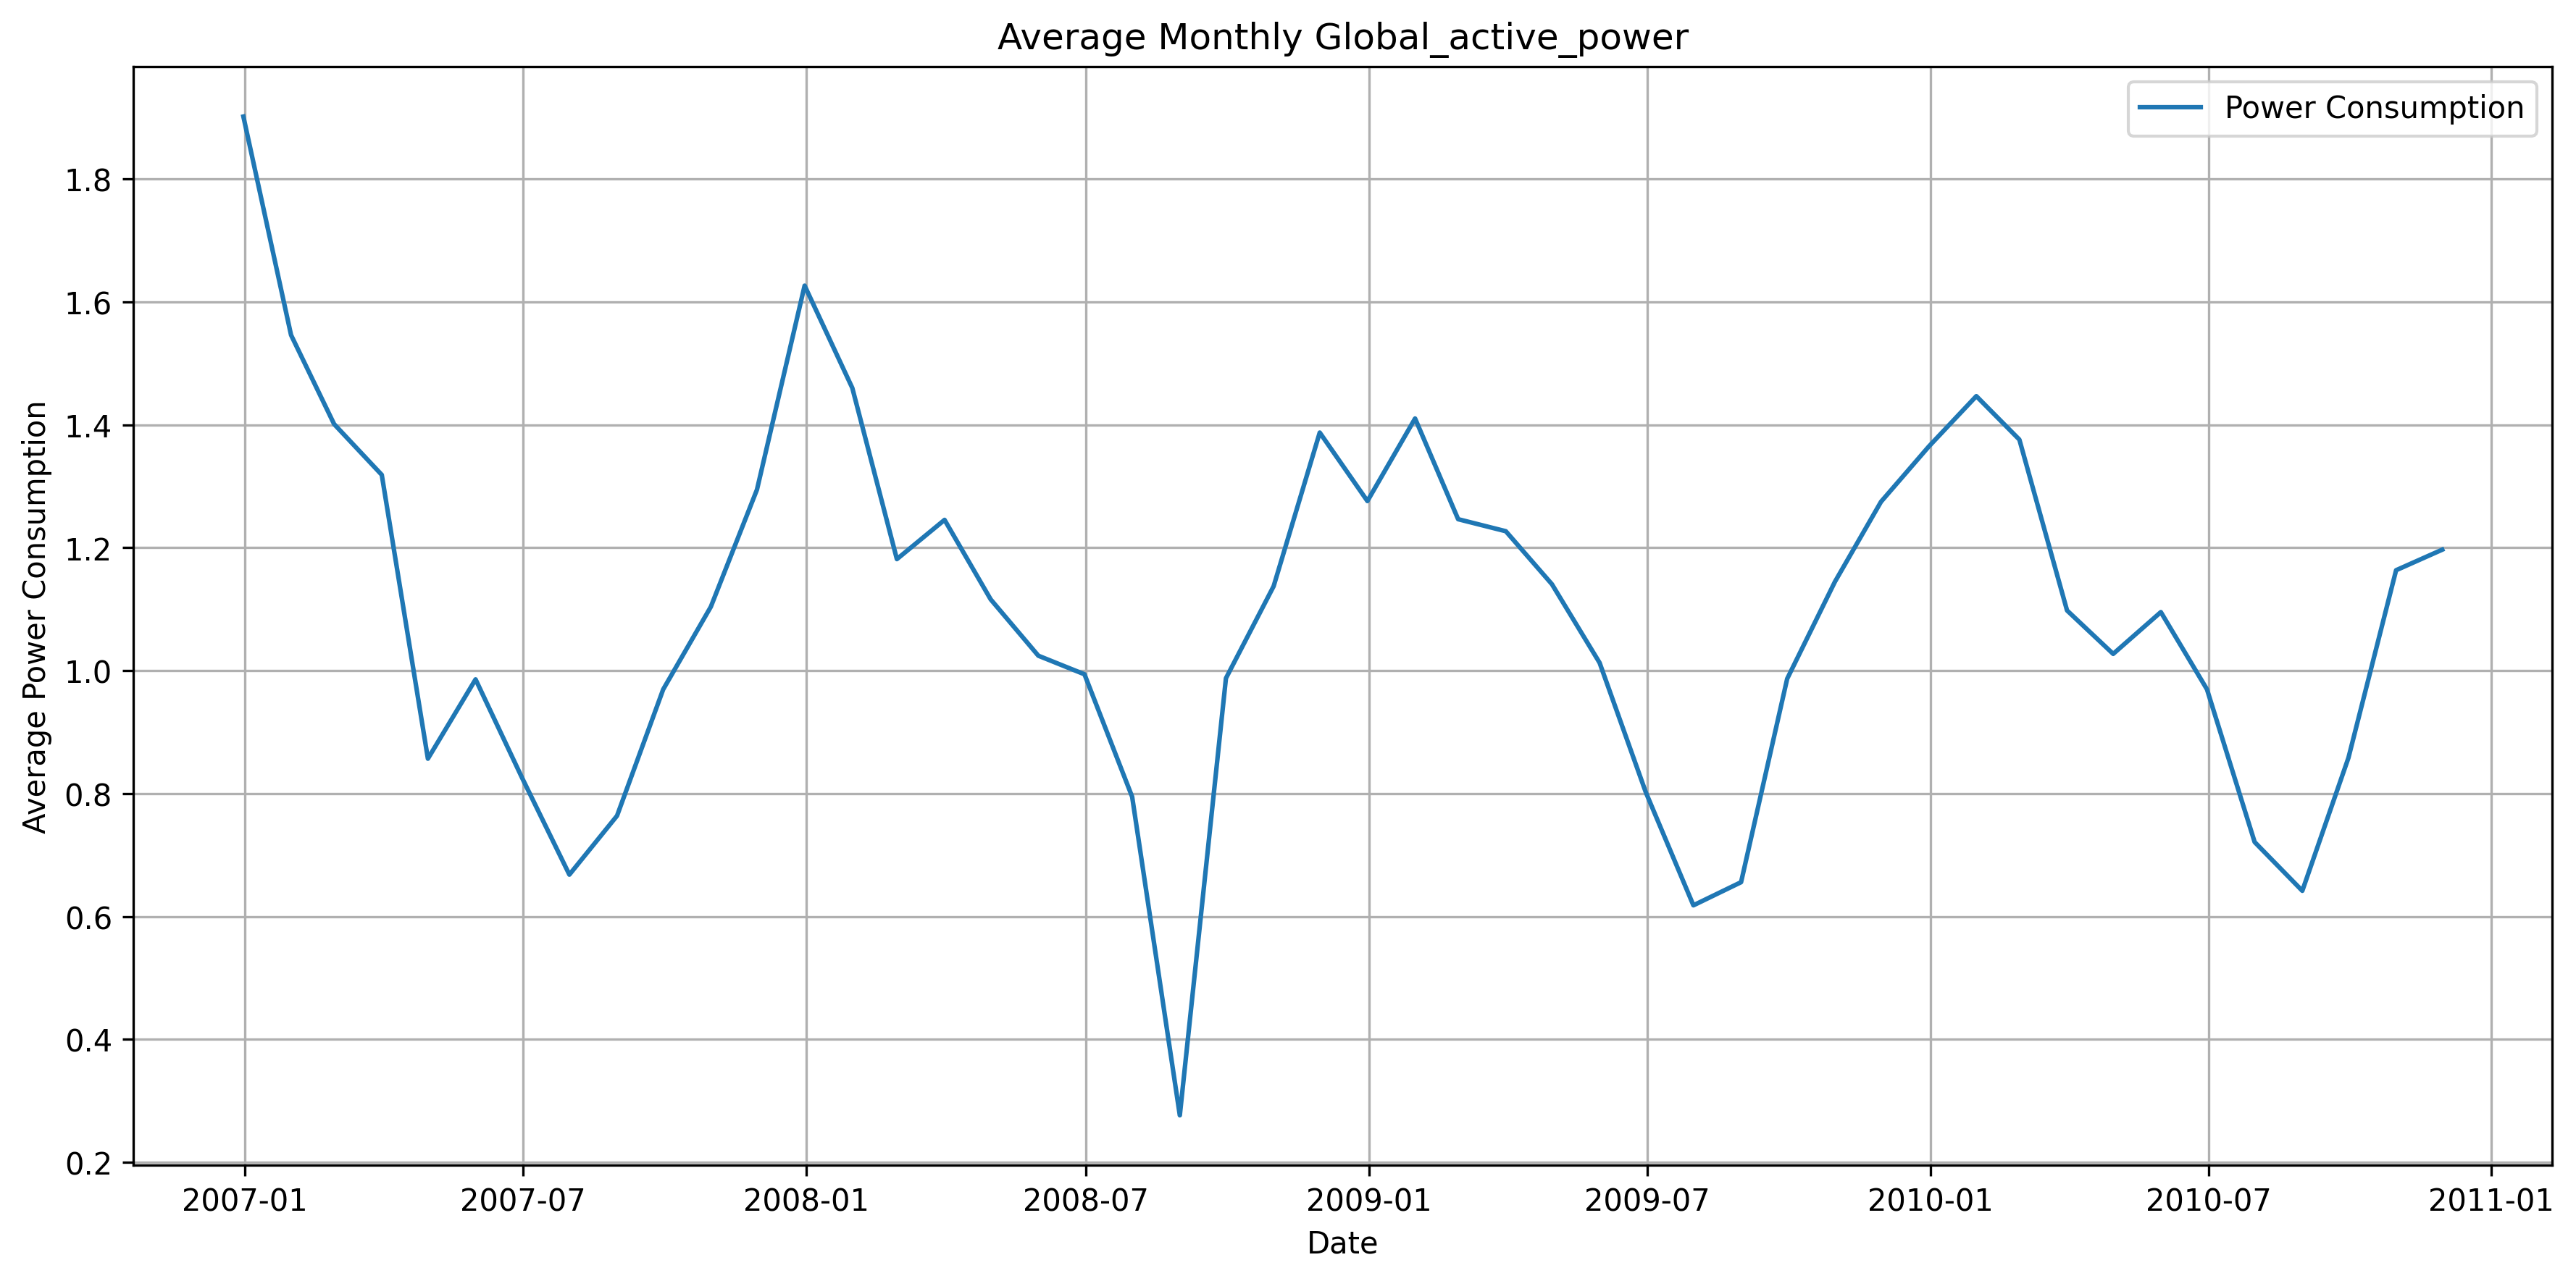

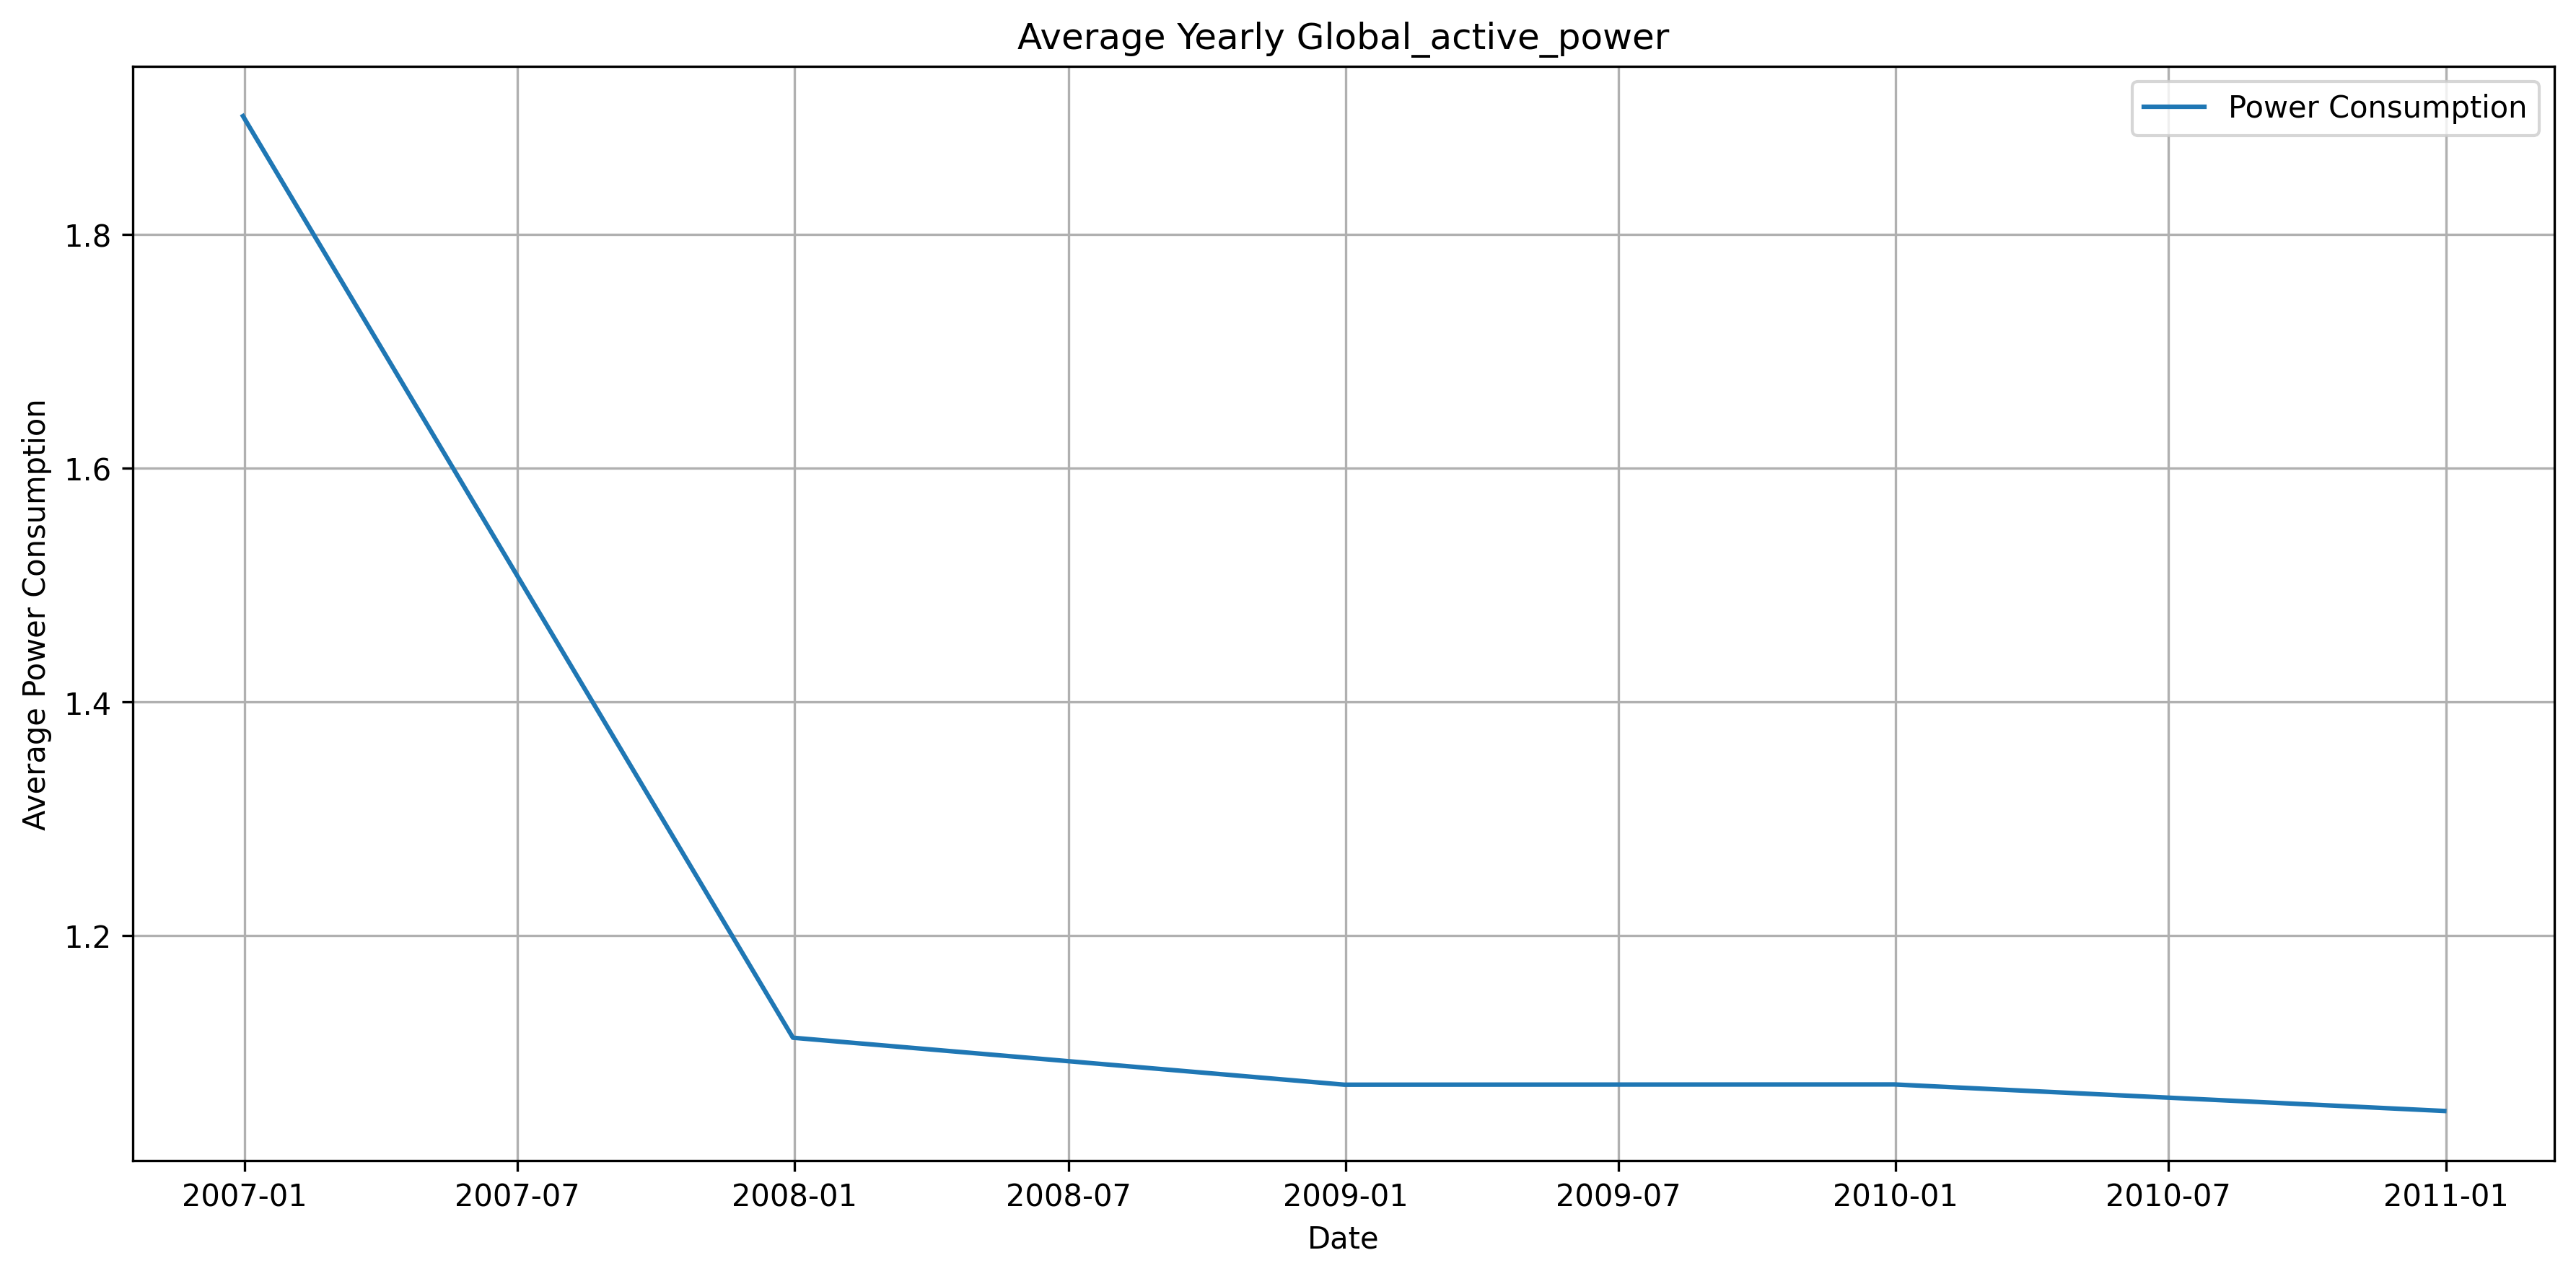

In [ ]:
# Plot hourly, daily, weekly, monthly and yearly Global_active_power
plot_power_consumption(df_hourly.Global_active_power, 'Average Hourly Global_active_power')
plot_power_consumption(df_daily.Global_active_power, 'Average Daily Global_active_power')
plot_power_consumption(df_weekly.Global_active_power, 'Average Weekly Global_active_power')
plot_power_consumption(df_monthly.Global_active_power, 'Average Monthly Global_active_power')
plot_power_consumption(df_yearly.Global_active_power, 'Average Yearly Global_active_power')

In [ ]:
# Define a fuction for Adfuller Test to test the stationarity
from statsmodels.tsa.stattools import adfuller

def adfuller_test(data, autolag='AIC', verbose=True):
    result = adfuller(data, autolag=autolag)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    results = {label: value for label, value in zip(labels, result[:4])}
    results['Critical Values'] = result[4]

    if verbose:
        for label, value in results.items():
            if label != 'Critical Values':
                print(f'{label} : {value}')
            else:
                print('Critical Values:')
                for key, val in value.items():
                    print(f'    {key}: {val}')
        if result[1] <= 0.05:
          print("\033[1;32;43m Time series is stationary \n")
        else:
          print("\033[1;33;40m Time series is non-stationary \n")
    else:
        return results

Adfuller Test for hourly, daily, weekly, monthly, quarterly, and yearly power consumption

In [ ]:
adfuller_test(df_hourly.Global_active_power)

ADF Test Statistic : -14.369492090325021
p-value : 9.54727021265478e-27
#Lags Used : 51
Number of Observations Used : 34537
Critical Values:
    1%: -3.4305393559398922
    5%: -2.8616236906108443
    10%: -2.566814545887977
 Time series is stationary 



In [ ]:
adfuller_test(df_daily.Global_active_power)

ADF Test Statistic : -3.708239982722001
p-value : 0.0039987330043129
#Lags Used : 22
Number of Observations Used : 1419
Critical Values:
    1%: -3.434966750462565
    5%: -2.8635789736973725
    10%: -2.5678555388041384
 Time series is stationary 



In [ ]:
adfuller_test(df_weekly.Global_active_power)

ADF Test Statistic : -4.349834737844265
p-value : 0.00036376103201717866
#Lags Used : 1
Number of Observations Used : 205
Critical Values:
    1%: -3.4626576734812318
    5%: -2.8757444215841326
    10%: -2.5743412314098753
 Time series is stationary 



In [ ]:
adfuller_test(df_monthly.Global_active_power)

ADF Test Statistic : -4.949639436102627
p-value : 2.789189314361623e-05
#Lags Used : 9
Number of Observations Used : 38
Critical Values:
    1%: -3.6155091011809297
    5%: -2.941262357486514
    10%: -2.6091995013850418
 Time series is stationary 



In [ ]:
adfuller_test(df_quarterly.Global_active_power)

ADF Test Statistic : -1.962363302047692
p-value : 0.3033152739987686
#Lags Used : 6
Number of Observations Used : 10
Critical Values:
    1%: -4.331573
    5%: -3.23295
    10%: -2.7487
 Time series is non-stationary 



In [ ]:
adfuller_test(df_yearly.Global_active_power)

ADF Test Statistic : -78.16527585502449
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 4
Critical Values:
    1%: -7.355440625
    5%: -4.474365000000001
    10%: -3.1269325
 Time series is stationary 



In [ ]:
# Create a new DataFrame for target variable for resampled data
df1 = df_hourly[['Global_active_power']]
df2 = df_daily[['Global_active_power']]
df3 = df_weekly[['Global_active_power']]
df4 = df_monthly[['Global_active_power']]
df5 = df_quarterly[['Global_active_power']]
df5 = df_yearly[['Global_active_power']]

# Hourly Power Consumption Forecasting

<Axes: xlabel='date_time'>

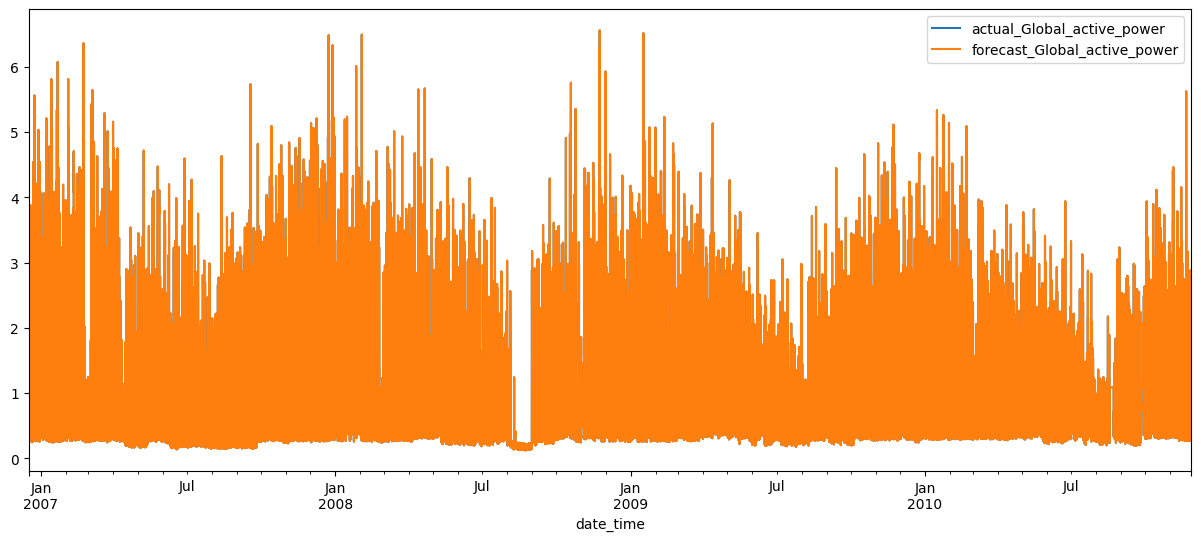

In [ ]:
# Create a base line model for hourly power consumption
df1_base = pd.concat([df1, df1.shift(1)], axis=1)

# Rename the column name
df1_base.columns = ["actual_Global_active_power", "forecast_Global_active_power"]

# Drop the NaN Values
df1_base.dropna(inplace=True)

# Show baseline dataframe
df1_base

# Plot the graph
df1_base.plot(figsize=(15, 6))

In [ ]:
# Calculate the RMSE for Hourly baseline model
df1_base_RMSE_error = np.sqrt(mean_squared_error(df1_base.actual_Global_active_power, df1_base.forecast_Global_active_power))
print(f"RMSE for Daily baseline model: {df1_base_RMSE_error:.3f}")

RMSE for Daily baseline model: 0.675


# Train & Test Split

In [ ]:
# Split the data into Train & Test Split
train_size = int(len(df1) * 0.80)
train_df1 = df1[:train_size]
test_df1 = df1[train_size:]

In [ ]:
# Check the shape of Train & Test Split
train_df1.shape, test_df1.shape

((27671, 1), (6918, 1))

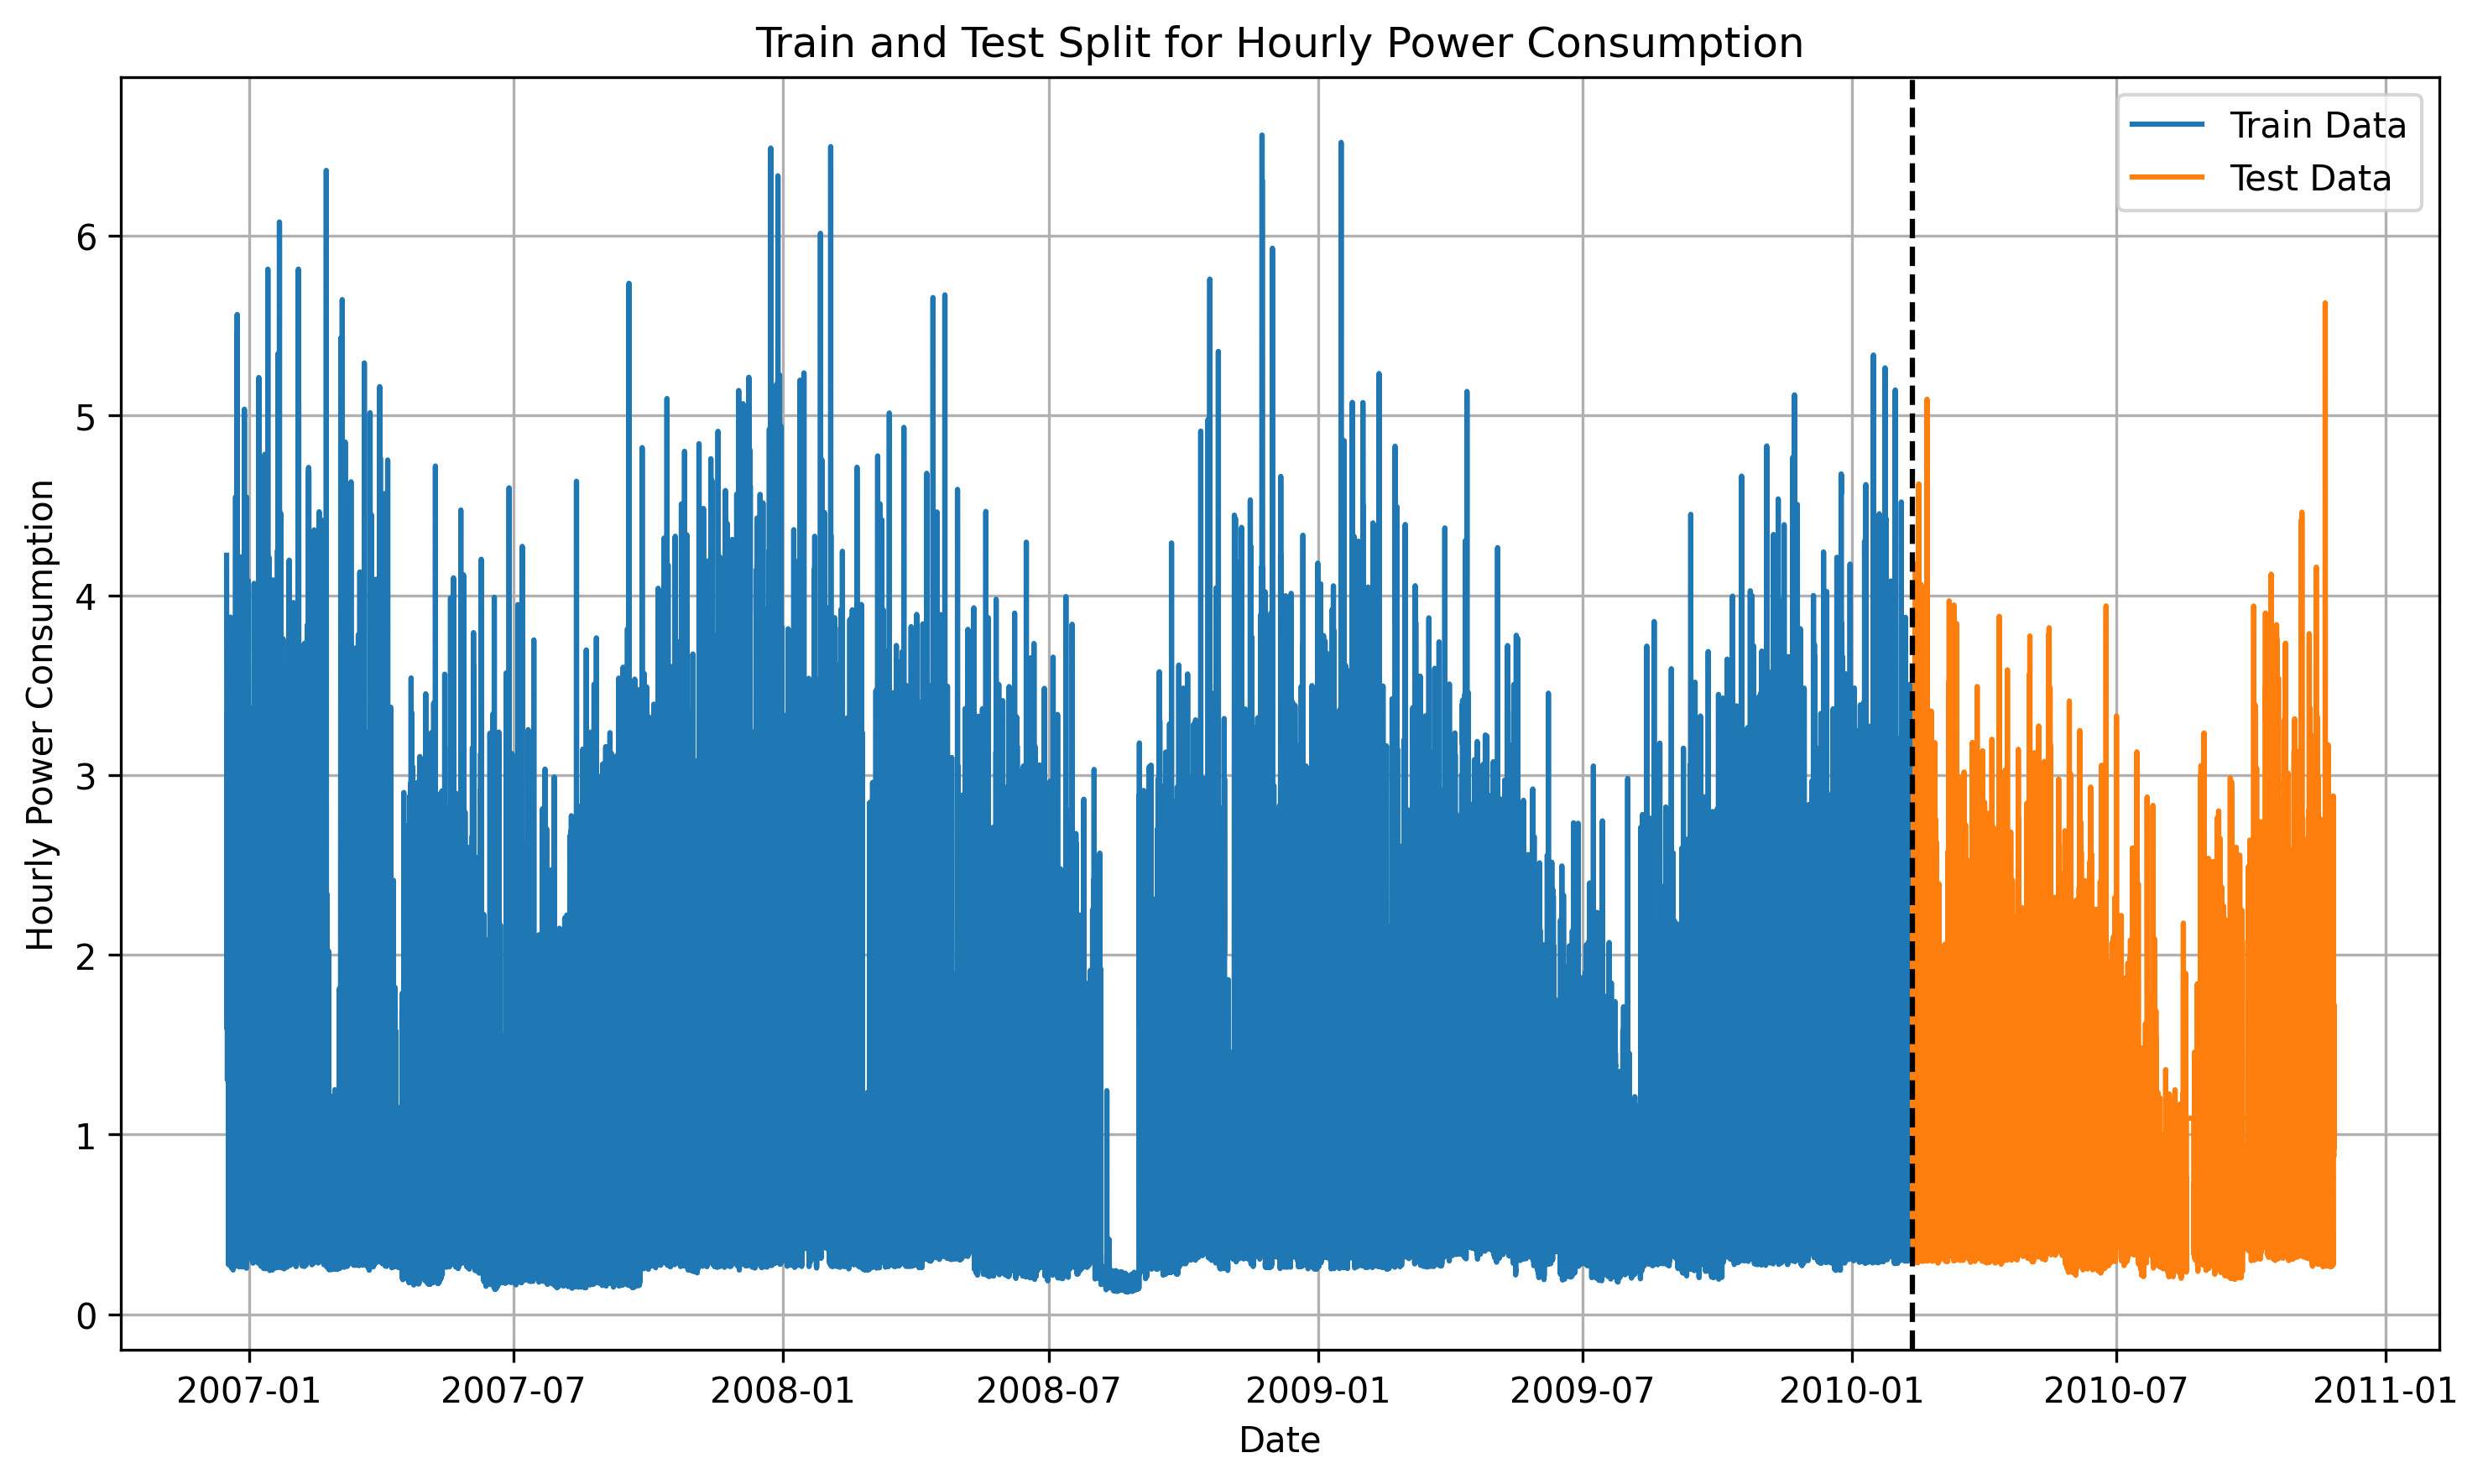

In [ ]:
# Plot the hourly train & test data
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(train_df1.Global_active_power, label='Train Data')
plt.plot(test_df1.Global_active_power, label='Test Data')
plt.axvline(test_df1.index[0], color='black', linestyle='--')
plt.title('Train and Test Split for Hourly Power Consumption')
plt.xlabel('Date')
plt.ylabel('Hourly Power Consumption')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# ARIMA model

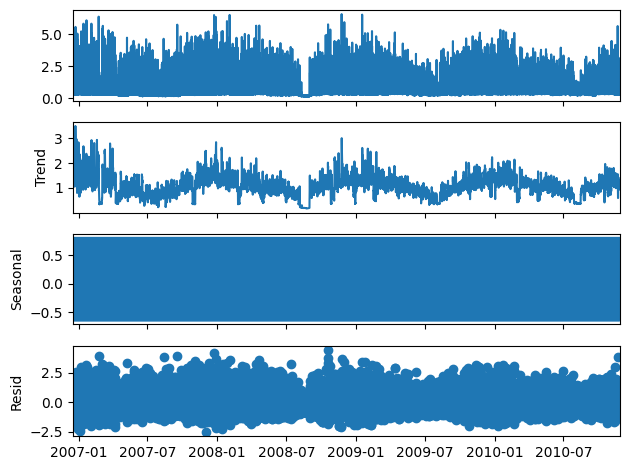

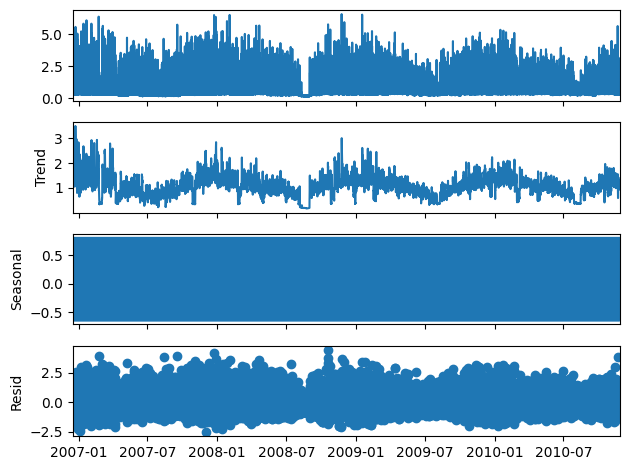

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df1, model='additive')
result.plot()

In [ ]:
adfuller_test(df1.power_consumption)

In [ ]:
adfuller_test(df1.power_consumption.diff().dropna())

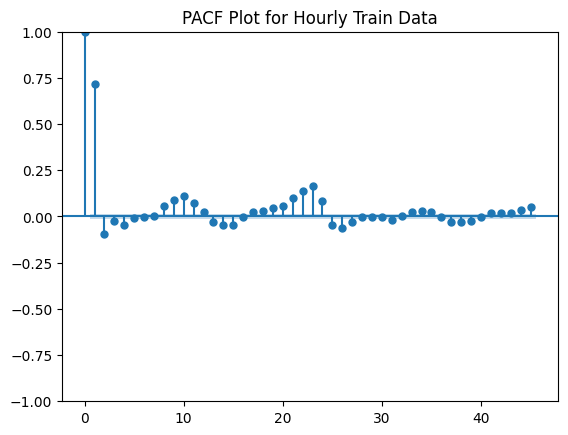

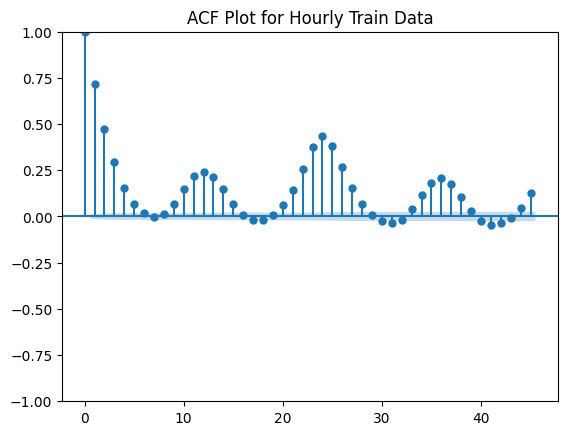

In [ ]:
# Plot ACF and PACF graphs
plot_pacf(train_df1.Global_active_power, title='PACF Plot for Hourly Train Data')
plot_acf(train_df1.Global_active_power, title='ACF Plot for Hourly Train Data')
plt.show()

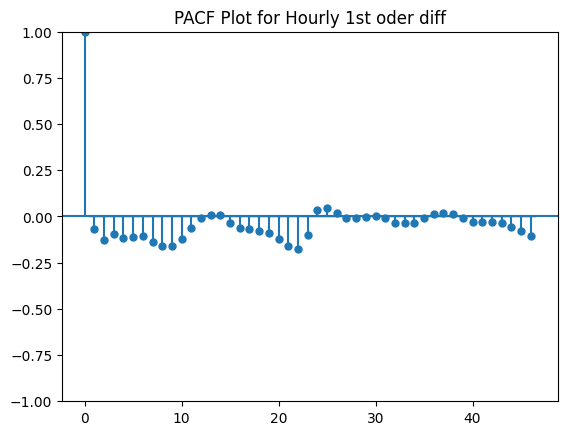

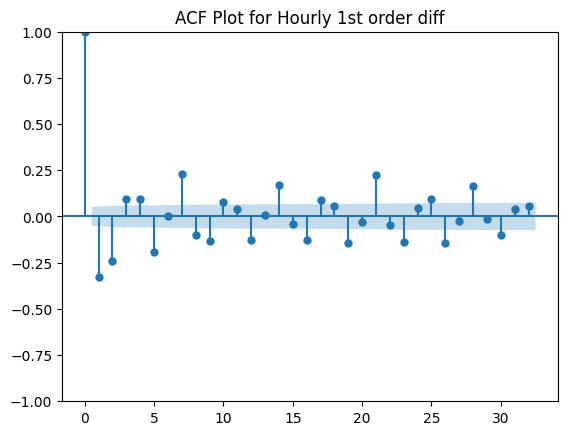

In [ ]:
# Plot ACF and PACF graphs
plot_pacf(df1.Global_active_power.diff().dropna(), title='PACF Plot for Hourly 1st oder diff')
plot_acf(df2.Global_active_power.diff().dropna(), title='ACF Plot for Hourly 1st order diff')
plt.show()

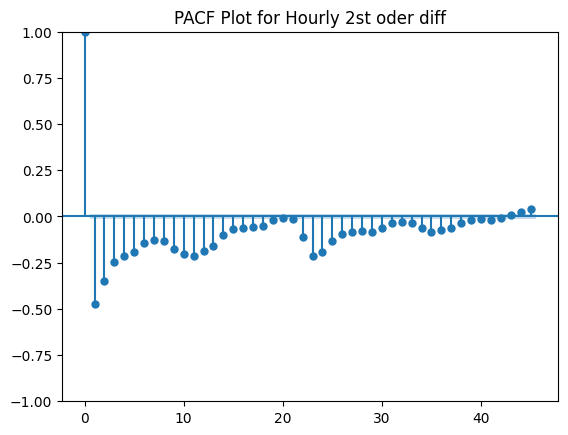

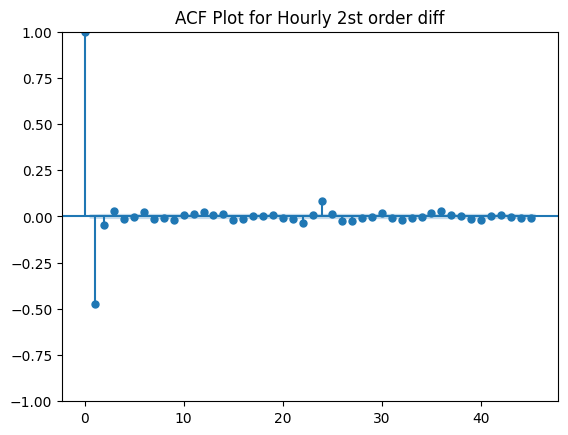

In [ ]:
# Plot ACF and PACF graphs
#plt.figure(figsize=(10, 5), dpi=300)
plot_pacf(train_df1.Global_active_power.diff().diff().dropna(), title='PACF Plot for Hourly 2st oder diff')
plot_acf(train_df1.Global_active_power.diff().diff().dropna(), title='ACF Plot for Hourly 2st order diff')
plt.show()

order=(3,0,2)
order=(2,0,2)gives good results

In [ ]:
# ARIMA model
model = ARIMA(train_df1, order= (5,0,3))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test_df1))
predictions = model_fit.predict(start=len(train_df1), end=len(train_df1) + len(test_df1) - 1, dynamic=True)
df1['forecast'] = predictions

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


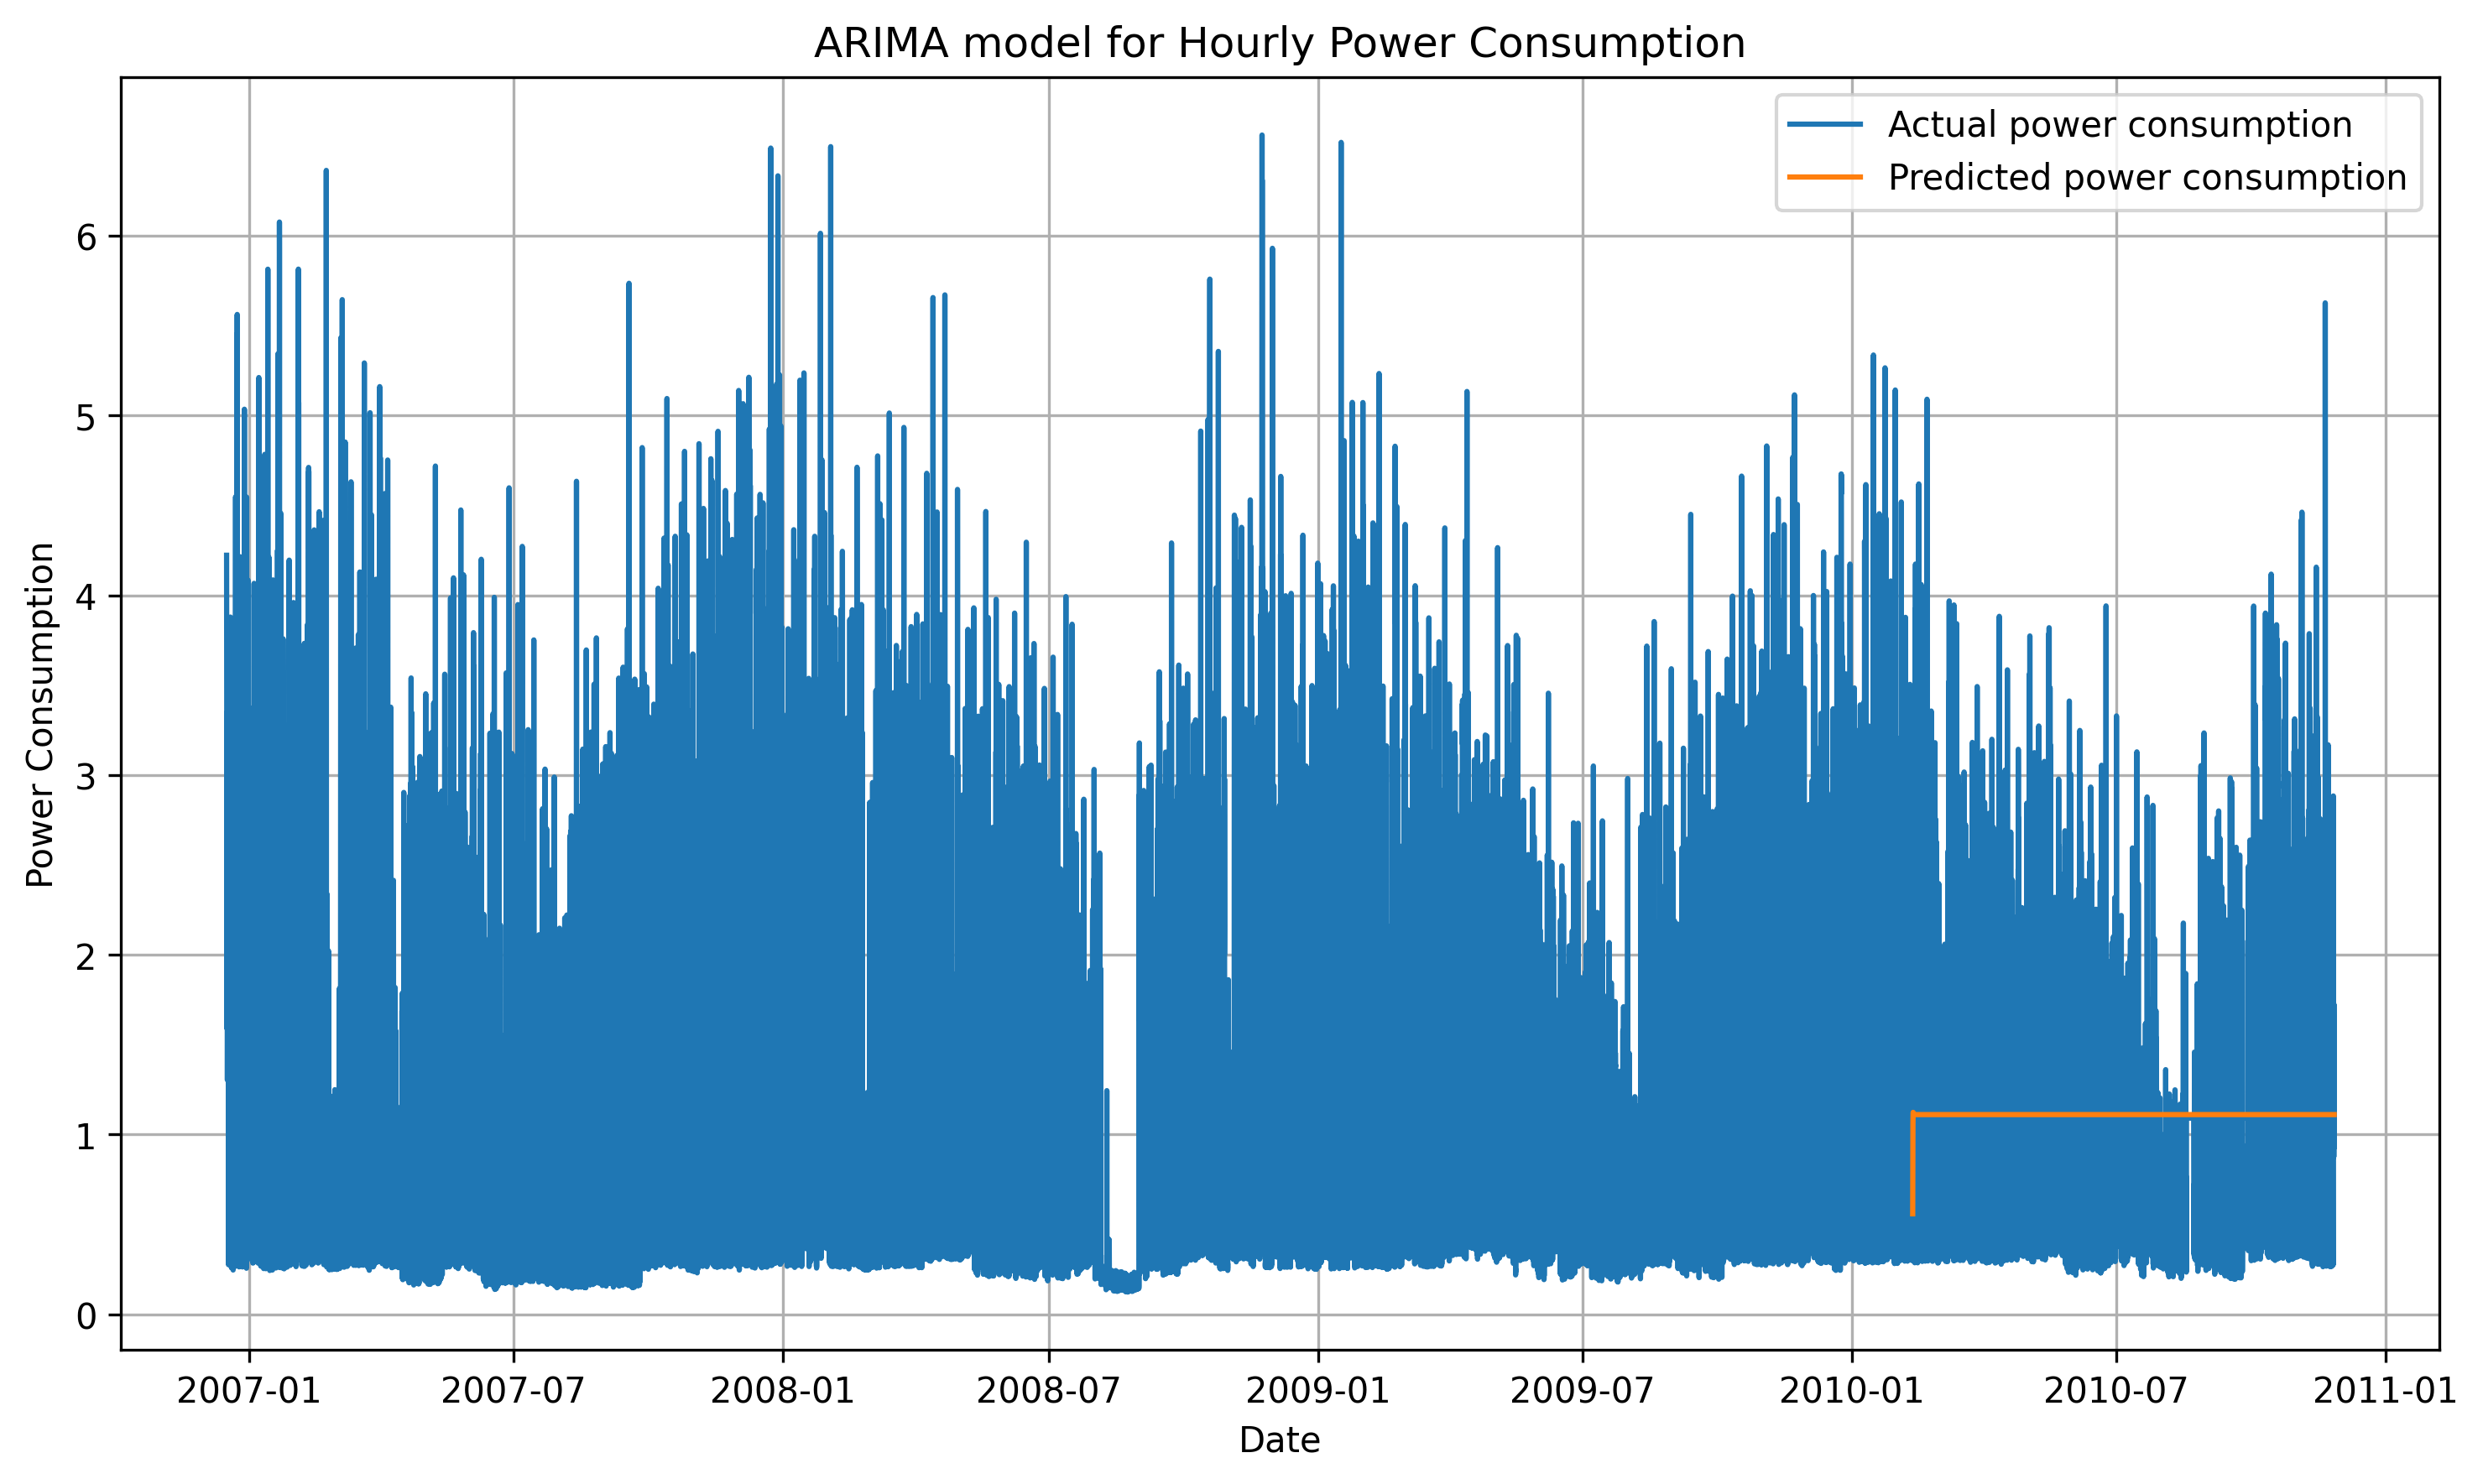

In [ ]:
#  Plot the results
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(df1.Global_active_power, label='Actual power consumption')
plt.plot(df1.forecast, label='Predicted power consumption')
plt.title('ARIMA model for Hourly Power Consumption')
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
# Calculate accuracy metrics
MAE = mean_absolute_error(test_df1.Global_active_power, predictions)
MSE = mean_squared_error(test_df1.Global_active_power, predictions)
RMSE = np.sqrt(MSE)

# Print accuracy metrics
print(f'Mean Absolute Error (MAE): {MAE:.2f}')
print(f'Mean Squared Error (MSE): {MSE:.2f}')
print(f'Root Mean Squared Error (RMSE): {RMSE:.2f}')

Mean Absolute Error (MAE): 0.61
Mean Squared Error (MSE): 0.53
Root Mean Squared Error (RMSE): 0.73


# Optimizing ARIMA model

In [ ]:
# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Define the p, d, q ranges
p_values = range(0, 9)
d_values = range(0, 0)
q_values = range(0, 9)

# Iterate over all combinations of p, d, q
best_score, best_cfg = float("inf"), None

# Iterate over all combinations of p, d, q to perform grid search
for p in p_values:
  for d in d_values:
    for q in q_values:
      order = (p,d,q)
      predictions = list()
      for i in range(len(test_df1)):
        try:
          model = ARIMA(train_df1, order=order)
          model_fit = model.fit()
          pred = model_fit.forecast()[0]
          predictions.append(pred)
          error = np.sqrt(mean_squared_error(test_df1, predictions))
          if error < best_score:
            best_score, best_cfg = error, order
            print('ARIMA %s RMSE = %.2f' % (best_cfg, best_score))
        except:
          continue
print('\033[1;33;40m Best ARIMA %s RMSE = %.2f' % (best_cfg, best_score))

 Best ARIMA None RMSE = inf


In [ ]:
'''
# Define a function for ARIMA for test dataset
def ARIMA_model(df, order):
  train_size = int(len(df) * 0.80)
  train_df = df[:train_size]
  test_df = df[train_size:]
  model = ARIMA(train_df, order=order)
  model_fit = model.fit()
  forecast = model_fit.forecast(steps=len(test_df))
  predictions = model_fit.predict(start=len(train_df), end=len(train_df) + len(test_df) - 1, dynamic=True)
  df['forecast'] = predictions
  '''

In [ ]:
'''
def plot_ARIMA_model(df, title='ARIMA Model'):
    plt.figure(figsize=(10, 6), dpi=300)
    plt.plot(df.power_consumption, label='Actual power consumption')
    plt.plot(df.forecast, label='Forecast', linestyle='--')
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Power Consumption")
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    '''

In [ ]:
'''ARIMA_model(data2, order=(3,1,2))
plot_power_consumption(data2, title='ARIMA Model')
'''

In [ ]:
'''
from pandas.tseries.offsets import DateOffset
future_dates=[df1.index[-1] + DateOffset(months=x)for x in range(0,12)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df1.columns)
future_df=pd.concat([df1,future_datest_df])
future_df['forecast'] = model_fit.predict(start=future_df.index[0],end=len(future_df)-1,dynamic=True)
future_df
'''

In [ ]:
'''
#Plot the results
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(future_df.power_consumption, label='Actual power consumption')
plt.plot(future_df.forecast, label='Forcast')
plt.title('ARIMA model')
plt.xlabel('Date')
plt.ylabel('Power Consumption')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()
'''

In [ ]:
#!pip install pmdarima
#from pmdarima import auto_arima

In [ ]:
'''# Fit Auto ARIMA model
model = auto_arima(df1["power_consumption"])  # Example with monthly seasonality
# Example: Make predictions for the next 10 time steps
forecast = model.predict(len(test_df))
print(forecast)
'''

In [ ]:
'''
plt.plot(df1.index, df1['power_consumption'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Auto ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.legend()
plt.show()
'''

In [ ]:
#decomposition = sm.tsa.seasonal_decompose(df1, model='additive')

In [ ]:
#result = pd.DataFrame(index=order1, data=rmse, columns=["RMSE"])
#result.to_csv("ARIMA_result.csv")

In [ ]:
#result

In [ ]:
# Transform the Global_active_power column of the data DataFrame into a numpy array of float values
dataset = df1.power_consumption.values.astype('float32')

#Reshape the numpy array into a 2D array with 1 column
dataset = np.reshape(dataset, (-1, 1))

#Create an instance of the MinMaxScaler class to scale the values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

#Fit the MinMaxScaler to the transformed data and transform the values
dataset = scaler.fit_transform(dataset)

#Split the transformed data into a training set (80%) and a test set (20%)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1122, 30), (1122,), (258, 30), (258,))

In [ ]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

X_train.shape, X_test.shape

((1122, 1, 30), (258, 1, 30))

In [ ]:
# Reshape input to be [samples, time steps, width, height, channels] for Conv2D
XX_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1, 1, 1))
XX_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1, 1, 1))
XX_train.shape, XX_test.shape

ValueError: cannot reshape array of size 33660 into shape (1122,1,1,1,1)

# LSTM model

In [ ]:
model = Sequential()
model.add(Conv2D(64, (2, 1), strides=(1, 1)), input_shape=(X_train.shape[1], X_train.shape[2]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 1), strides=(2, 1)))
model.add(Conv2D(64, (2, 1), strides=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 1), strides=(2, 1)))
model.add(LSTM(64, return_sequences=True))
model.add(Activation('tanh'))
model.add(LSTM(64, return_sequences=False))
model.add(Activation('tanh'))
model.add(Dense(32, activation='relu'))
model.add(Dense(60, activation='relu'))

TypeError: Sequential.add() got an unexpected keyword argument 'input_shape'

In [ ]:
# Defining the LSTM model
model = Sequential()

# Adding the first layer with 100 LSTM units and input shape of the data
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))

# Adding a dropout layer to avoid overfitting
model.add(Dropout(0.2))

# Adding a dense layer with 1 unit to make predictions
model.add(Dense(1))

# Compiling the model with mean squared error as the loss function and using Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the model on training data and using early stopping to avoid overfitting
history = model.fit(X_train, Y_train, epochs=20, batch_size=124, validation_data=(X_test, Y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# Displaying a summary of the model
model.summary()

Epoch 1/20
10/10 [==============================] - 9s 142ms/step - loss: 0.0165 - val_loss: 0.0042
Epoch 2/20
10/10 [==============================] - 0s 9ms/step - loss: 0.0082 - val_loss: 0.0042
Epoch 3/20
10/10 [==============================] - 0s 8ms/step - loss: 0.0063 - val_loss: 0.0036
Epoch 4/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0060 - val_loss: 0.0034
Epoch 5/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0057 - val_loss: 0.0035
Epoch 6/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0057 - val_loss: 0.0033
Epoch 7/20
10/10 [==============================] - 0s 8ms/step - loss: 0.0057 - val_loss: 0.0033
Epoch 8/20
10/10 [==============================] - 0s 9ms/step - loss: 0.0055 - val_loss: 0.0032
Epoch 9/20
10/10 [==============================] - 0s 8ms/step - loss: 0.0055 - val_loss: 0.0031
Epoch 10/20
10/10 [==============================] - 0s 9ms/step - loss: 0.0054 - val_loss: 0.0031
Epoch 11/20
10

# Evaluation

In [ ]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

9/9 [==============================] - 0s 3ms/step
Train Mean Absolute Error: 1.916446926882778
Train Root Mean Squared Error: 2.7515281817905777
Test Mean Absolute Error: 1.6331683273067212
Test Root Mean Squared Error: 2.167369533936087


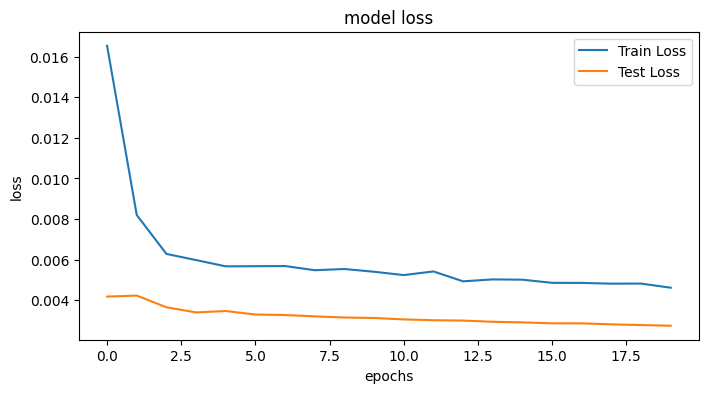

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

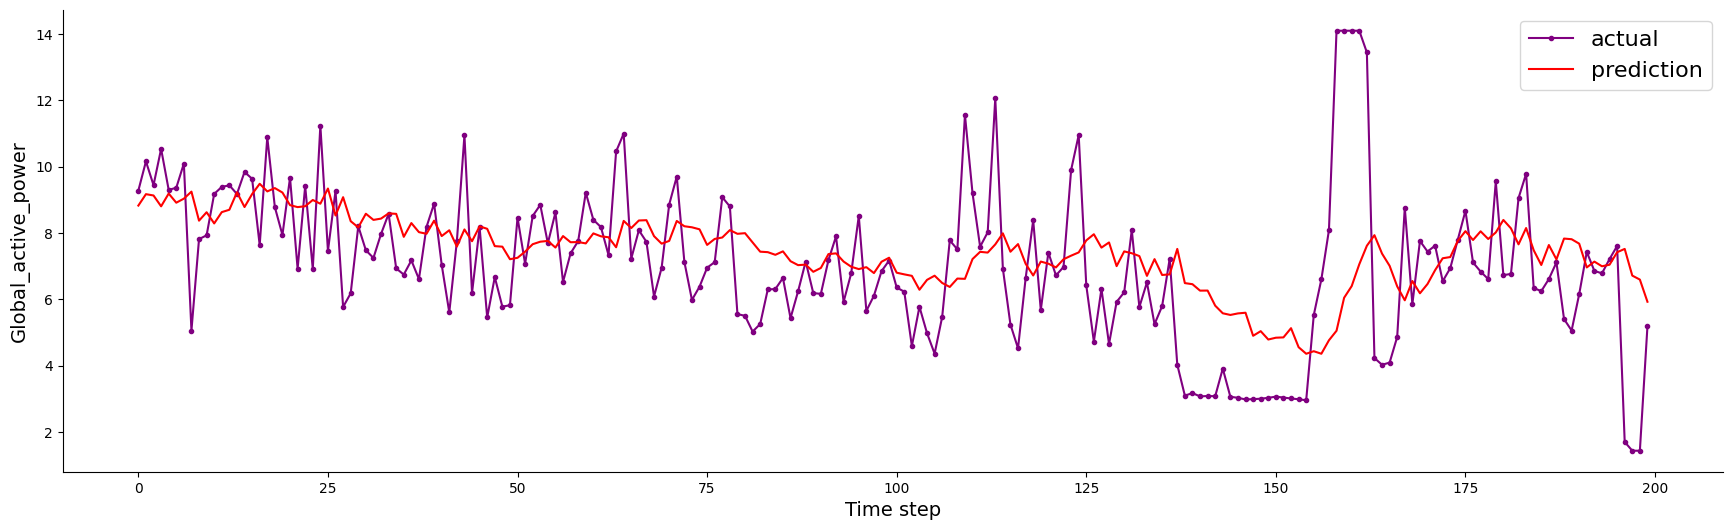

In [ ]:
aa=[x for x in range(200)]
# Creating a figure object with desired figure size
plt.figure(figsize=(20,6))

# Plotting the actual values in blue with a dot marker
plt.plot(aa, Y_test[0][:200], marker='.', label="actual", color='purple')

# Plotting the predicted values in green with a solid line
plt.plot(aa, test_predict[:,0][:200], '-', label="prediction", color='red')

# Removing the top spines
sns.despine(top=True)

# Adjusting the subplot location
plt.subplots_adjust(left=0.07)

# Labeling the y-axis
plt.ylabel('Global_active_power', size=14)

# Labeling the x-axis
plt.xlabel('Time step', size=14)

# Adding a legend with font size of 15
plt.legend(fontsize=16)

# Display the plot
plt.show()